# Лабораторная работа 4: Машина опорных векторов (SVM)

#  Балакиревой Дарьи, НПМбд-01-19б

Результат лабораторной работы — **отчет**. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Нам не интересен ваш код. Чем меньше кода, тем лучше всем: нам — меньше проверять, вам — проще найти ошибку или дополнить эксперимент.

Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Ответы на вопросы должны быть полными, четкими и хорошо аргументированными.

## 1. Квадратичное программирование и QP-солвер

Квадратичное программирование (QP) — специальный тип задач математической оптимизации, заключающийся в нахождении точки минимума неотрицательно-определенной квадратичной формы (многомерная парабола) в присутствии линейных ограничений:
$$
\begin{gather}
    \frac{1}{2}\boldsymbol x^T\boldsymbol P\boldsymbol x + \boldsymbol q^T\boldsymbol x \to \min_{\boldsymbol x} \\
    \begin{aligned}
        \text{s.t.} \quad & \boldsymbol G\boldsymbol x \le \boldsymbol h \\
        & \boldsymbol A\boldsymbol x = \boldsymbol b
    \end{aligned}
\end{gather}
$$

Здесь $\boldsymbol P$ — симметричная матрица. В ограничениях $\boldsymbol G\boldsymbol x \le \boldsymbol h$ и $\boldsymbol A\boldsymbol x = \boldsymbol b$ под знаками равенства и неравенства подразумевается сравнение всех компонент векторов.

Задача квадратичного программирования хорошо изучена, существуют эффективные алгоритмы для ее решения. Имеется множество библиотек с солверами для задачи QP, вот некоторые из них:
 - [CVXOPT](http://cvxopt.org/) (свободно-распространяемая, Python) **рекомендуется к использованию**
 - [Mosek](https://www.mosek.com/) (коммерческая с возможностью получения академической лицензии, C, Java, MATLAB, .NET, R, Python)
 - [Matlab Optimization Toolbox](http://www.mathworks.com/help/optim/ug/quadprog.html) 

#### Задание

1. Установите QP-солвер, разберитесь с его интерфейсом.
2. Протестируйте солвер, решив простую задачу оптимизации в двумерном пространстве:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$
3. Какие из ограничений-неравенств задачи являются _активными_, т.е. влияют на точку оптимума, а какие ограничения можно выбросить и точка оптимума не поменяется?

In [1]:
import numpy as np
import cvxopt 
from cvxopt import matrix
from cvxopt import solvers

In [2]:
P = matrix(np.diag([2, 8]), tc = 'd')
q = matrix(np.array([-8, -16]), tc = 'd')
G = matrix(np.array([[1, 1], [1, 0], [-1, 0], [0, -1]]), tc = 'd')
h = matrix(np.array([5, 3, 0, 0]), tc = 'd')

sol = solvers.qp(P,q,G,h)
print('\nРешение:', sol['x'])

     pcost       dcost       gap    pres   dres
 0: -3.0512e+01 -3.8829e+01  8e+00  0e+00  2e-01
 1: -3.0792e+01 -3.1146e+01  4e-01  2e-16  5e-03
 2: -3.0982e+01 -3.1024e+01  4e-02  2e-16  4e-04
 3: -3.0997e+01 -3.1003e+01  6e-03  9e-17  4e-17
 4: -3.1000e+01 -3.1000e+01  7e-04  2e-16  5e-18
 5: -3.1000e+01 -3.1000e+01  1e-04  2e-16  3e-17
 6: -3.1000e+01 -3.1000e+01  1e-05  2e-16  3e-17
Optimal solution found.

Решение: [ 3.00e+00]
[ 2.00e+00]



Без ограничения $x_1 + x_2 \leq 5 $

In [3]:
P = matrix(np.diag([2, 8]), tc = 'd')
q = matrix(np.array([-8, -16]), tc = 'd')
G = matrix(np.array([[1, 0], [-1, 0], [0, -1]]), tc = 'd')
h = matrix(np.array([3, 0, 0]), tc = 'd')

sol = solvers.qp(P,q,G,h)
print('\nРешение:', sol['x'])

     pcost       dcost       gap    pres   dres
 0: -3.0240e+01 -3.7371e+01  7e+00  0e+00  2e-01
 1: -3.0901e+01 -3.1124e+01  2e-01  1e-16  5e-03
 2: -3.0999e+01 -3.1001e+01  3e-03  7e-17  6e-05
 3: -3.1000e+01 -3.1000e+01  3e-05  0e+00  6e-07
 4: -3.1000e+01 -3.1000e+01  3e-07  2e-16  6e-09
Optimal solution found.

Решение: [ 3.00e+00]
[ 2.00e+00]



Без ограничения $x_1 \leq 3 $

In [4]:
P = matrix(np.diag([2, 8]), tc = 'd')
q = matrix(np.array([-8, -16]), tc = 'd')
G = matrix(np.array([[1, 1], [-1, 0], [0, -1]]), tc = 'd')
h = matrix(np.array([5, 0, 0]), tc = 'd')

sol = solvers.qp(P,q,G,h)
print('\nРешение:', sol['x'])

     pcost       dcost       gap    pres   dres
 0: -3.0419e+01 -3.8120e+01  8e+00  0e+00  2e-16
 1: -3.1027e+01 -3.1339e+01  3e-01  2e-16  4e-17
 2: -3.1196e+01 -3.1201e+01  6e-03  2e-16  2e-17
 3: -3.1200e+01 -3.1200e+01  6e-05  4e-16  2e-17
 4: -3.1200e+01 -3.1200e+01  6e-07  4e-17  4e-17
Optimal solution found.

Решение: [ 3.20e+00]
[ 1.80e+00]



Без ограничения $x_1 \geq 0 $

In [5]:
P = matrix(np.diag([2, 8]), tc = 'd')
q = matrix(np.array([-8, -16]), tc = 'd')
G = matrix(np.array([[1, 1], [1, 0], [0, -1]]), tc = 'd')
h = matrix(np.array([5, 3, 0]), tc = 'd')

sol = solvers.qp(P,q,G,h)
print('\nРешение:', sol['x'])

     pcost       dcost       gap    pres   dres
 0: -3.1547e+01 -3.0486e+01  1e+01  5e-01  3e-01
 1: -3.0164e+01 -3.1582e+01  1e+00  4e-17  1e-17
 2: -3.0958e+01 -3.1037e+01  8e-02  2e-16  7e-17
 3: -3.0994e+01 -3.1006e+01  1e-02  2e-16  2e-17
 4: -3.0999e+01 -3.1001e+01  2e-03  0e+00  4e-17
 5: -3.1000e+01 -3.1000e+01  2e-04  2e-16  6e-17
 6: -3.1000e+01 -3.1000e+01  3e-05  0e+00  3e-17
 7: -3.1000e+01 -3.1000e+01  4e-06  8e-17  4e-17
Optimal solution found.

Решение: [ 3.00e+00]
[ 2.00e+00]



Без ограничения $x_2 \geq 0 $

In [6]:
P = matrix(np.diag([2, 8]), tc = 'd')
q = matrix(np.array([-8, -16]), tc = 'd')
G = matrix(np.array([[1, 1], [1, 0], [-1, 0]]), tc = 'd')
h = matrix(np.array([5, 3, 0]), tc = 'd')

sol = solvers.qp(P,q,G,h)
print('\nРешение:', sol['x'])

     pcost       dcost       gap    pres   dres
 0: -3.0547e+01 -3.4734e+01  4e+00  0e+00  3e-01
 1: -3.0841e+01 -3.1065e+01  2e-01  2e-16  7e-03
 2: -3.0992e+01 -3.1009e+01  2e-02  8e-17  4e-04
 3: -3.0999e+01 -3.1001e+01  2e-03  2e-16  4e-17
 4: -3.1000e+01 -3.1000e+01  3e-04  0e+00  2e-17
 5: -3.1000e+01 -3.1000e+01  4e-05  8e-17  2e-17
 6: -3.1000e+01 -3.1000e+01  6e-06  1e-16  3e-17
Optimal solution found.

Решение: [ 3.00e+00]
[ 2.00e+00]



Видно, что только условие $x_1 \leq 3 $ активное, значит остальные можно убрать

In [7]:
P = matrix(np.diag([2, 8]), tc = 'd')
q = matrix(np.array([-8, -16]), tc = 'd')
G = matrix(np.array([[1, 0]]), tc = 'd')
h = matrix(np.array([3]), tc = 'd')

sol = solvers.qp(P,q,G,h)
print('\nРешение:', sol['x'])

     pcost       dcost       gap    pres   dres
 0: -3.1889e+01 -3.1444e+01  7e-01  6e-01  1e-16
 1: -3.1639e+01 -3.1160e+01  1e-02  1e-01  4e-17
 2: -3.0992e+01 -3.1000e+01  8e-03  0e+00  1e-16
 3: -3.1000e+01 -3.1000e+01  8e-05  1e-16  0e+00
 4: -3.1000e+01 -3.1000e+01  8e-07  0e+00  2e-17
Optimal solution found.

Решение: [ 3.00e+00]
[ 2.00e+00]



## 2. Линейный SVM

Рассмотрим задачу бинарной классификации. Будем обозначать обучающую выборку $\{(\boldsymbol x_n, y_n)\}_{n=1}^N$, где $N$ — количество объектов, $\boldsymbol x_n \in \mathbb{R}^d$ — числовой вектор признакового описания объекта, $y_n \in \{+1, -1\}$ — класс объекта.

Машина опорных векторов обучает модель разделяющей гиперплоскости:
$$f(\boldsymbol x) = \boldsymbol w^T \boldsymbol x + b$$
Параметры модели — вектор весов $\boldsymbol w \in \mathbb{R}^d$ и сдвиг $b \in \mathbb{R}$.

Обучение модели происходит путем решения оптимизационной задачи:
$$
\begin{gather}
    \frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{n=1}^N \xi_n \to \min_{\boldsymbol w, \boldsymbol \xi, b} \\
    \text{s.t.: } \quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1 - \xi_n, \quad \xi_n \geq 0, \quad \forall n=1,\dots,N
\end{gather}
$$

Ограничения вида $\quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1$ требуют, чтобы объекты правильно классифицировались разделяющей гиперплоскостью. Поскольку линейная разделимость выборки не гарантируется на практике, вводят переменные $\xi_n$ (slack variables), которые ослабляют ограничения правильной классификации. В оптимизируемом функционале слагаемое $\| \boldsymbol w \|^2$ штрафует малую ширину разделяющей гиперплоскости, сумма $\sum_n \xi_n$ штрафует ослабление ограничений. 

Гиперпараметр $C$ задает баланс между шириной разделяющей полосы и ошибками, допускаемыми классификатором. Обратите внимание, что $C$ фиксируется до обучения и не оптимизируется вместе с параметрами модели.

Гиперпараметр $C$ отвечает за обобщающую способность разделяющей гиперплоскости, высокая обобщающая способность (соотвествующая большому значению $C$) может привести к переобучению, если линейная модель хорошо описывает обучающие примеры. При подборе оптимального параметра $C$ необходимо оценивать качество на отложенной выборке или кросс-валидации. Как правило, для конкретной задачи заранее неизвестно, какой порядок имеет оптимальное значение гиперпараметра $C$, поэтому перебирать значения лучше по логарифмической сетке, например: $10^{-3}, 10^{-2}, \dots, 10^{5}$.

После нахождения решения оптимизационной задачи $(\boldsymbol w_{\star}, \boldsymbol \xi_{\star}, b_{\star})$, часть ограничений становятся _активными_, т.е. переходят в "крайнее положение" — точное равенство:
$$\quad y_n (\boldsymbol w_{\star}^T \boldsymbol x_n + b_{\star}) = 1 - \xi_{\star,n}$$
Объекты, соответствующие активным ограничениям называются _опорными_.

#### Явное преобразование признаков

Разделяющая гиперплоскость — достаточно грубая модель, редко данные могут быть описаны линейной моделью. Линейная неразделимость векторов может быть исправлена путем перехода в другое признаковое пространство, в котором линейная модель лучше описывает данные и, возможно, существует правильно классифицирующая разделяющая гиперплоскость:

$$\boldsymbol x \in \mathbb{R}^d \mapsto \phi(\boldsymbol x) \in \mathbb{R}^t$$

Так, например, добавление всех попарных произведений признаков: $\phi(x_1, \dots, x_d) = (x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2)$ переводит в пространство, в котором линейная гиперплоскость является квадратичной формой в исходном пространстве и в исходном пространстве признаков разделяющая поверхность может быть, скажем, эллипсом.

[Видеоролик с демонстрацией](https://youtu.be/9NrALgHFwTo)

#### Задание
  1. Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.
  2. Сгенерируйте три случайные двумерные выборки для бинарной классификации:
    - с линейно-разделимыми классами
    - с хорошо разделимыми классами, но не линейно
    - с плохо разделимыми классами по имеющимся признакам
  3. Протестируйте линейный SVM на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Постройте классификаторы с различным значением параметра $C$.
  4. Как зависит число опорных векторов от параметра $C$ для различных выборок?
  5. Используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите ее на плоскости.

In [2]:
from sklearn.base import BaseEstimator
from cvxopt import matrix
from cvxopt import solvers

class LinearSVM(BaseEstimator):
    def __init__(self, C, transform=None):
        self.C = C
        self.transform = transform
    
    def QP_solver(self, X, y):
        
        dim = X.shape[1]
        N = X.shape[0]

        P = np.vstack([np.eye(dim), np.zeros((N + 1, dim))])
        P = np.hstack([P, np.zeros((dim + N + 1, N + 1))])
        P = matrix(P, tc = 'd')
        
        q = matrix(np.hstack([np.zeros(dim + 1), self.C * np.ones(N)]), tc = 'd')
        
        G_1 = np.hstack([-y.reshape(len(y), 1) * X, -y.reshape(len(y), 1), -np.eye(N)])
        G_2 = np.hstack([np.zeros((N, dim + 1)), -np.eye(N)])  
        G = np.vstack([G_1, G_2])
        G = matrix(G, tc = 'd')
        
        h = matrix(np.hstack([-np.ones(N), np.zeros(N)]), tc = 'd')
        
        sol = solvers.qp(P,q,G,h)
        res = sol['x']
        return res
        
    def fit(self, X, y):
        """
        Функция обучения модели.
        """
        dim = X.shape[1]
        N = X.shape[0]
        
        res = self.QP_solver(X, y)
        
        self.weights_ = np.array(res[ : dim])
        self.bias_ = np.array(res[dim : dim + 1])
        self.penalties_ = np.array(res[dim + 1 : ])
        
        self.support_vectors_mask_ = np.zeros(N)
        for i in range(N):
            if np.round(y[i] * (self.weights_.T @ X[i, :] + self.bias_), 6) == np.round(1 - self.penalties_[i], 6):
                self.support_vectors_mask_[i] = 1
        mask = (self.support_vectors_mask_ == 1)
        self.support_vectors_ = X[mask]
        self.support_vectors_class_ = y[mask]
        
                
    def predict_proba(self, X):
        return (np.dot(X, self.weights_) + self.bias_).ravel()
            
    def predict(self, X):
        return np.sign(self.predict_proba(X))

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

Три сгенерированные выборки

Text(0.5, 1.0, 'Плохо разделимые')

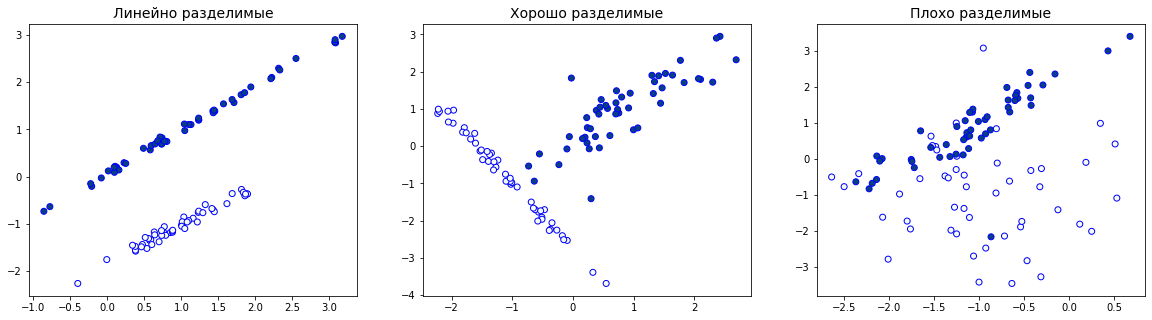

In [50]:
X_1, y_1 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes = 2, n_clusters_per_class=1, \
                             random_state=42)
y_1 = y_1 * 2 - 1

X_2, y_2 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes = 2, n_clusters_per_class=1, \
                               random_state=55)
y_2 = y_2 * 2 - 1

X_3, y_3 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes = 2, n_clusters_per_class=1, \
                               random_state=460)
y_3 = y_3 * 2 - 1

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].scatter(X_1[:, 0], X_1[:, 1], c = y_1, cmap='GnBu', edgecolor='blue')
ax[1].scatter(X_2[:, 0], X_2[:, 1], c = y_2, cmap='GnBu', edgecolor='blue')
ax[2].scatter(X_3[:, 0], X_3[:, 1], c = y_3, cmap='GnBu', edgecolor='blue')

ax[0].set_title('Линейно разделимые', fontsize = 14)
ax[1].set_title('Хорошо разделимые', fontsize = 14)
ax[2].set_title('Плохо разделимые', fontsize = 14)

Линейный SVM на выборках

     pcost       dcost       gap    pres   dres
 0:  1.7802e-01  1.1856e+01  2e+02  2e+00  1e+02
 1:  1.0253e+01 -4.6849e+00  2e+01  4e-02  3e+00
 2:  2.3163e+00  8.5192e-01  1e+00  4e-16  1e-15
 3:  1.3183e+00  9.5616e-01  4e-01  2e-16  1e-15
 4:  1.2638e+00  1.0009e+00  3e-01  2e-16  1e-15
 5:  1.1527e+00  1.0476e+00  1e-01  2e-16  1e-15
 6:  1.1144e+00  1.0697e+00  4e-02  2e-16  3e-15
 7:  1.0916e+00  1.0852e+00  6e-03  2e-16  3e-15
 8:  1.0885e+00  1.0875e+00  1e-03  2e-16  1e-15
 9:  1.0880e+00  1.0879e+00  1e-04  2e-16  8e-15
10:  1.0880e+00  1.0880e+00  2e-06  2e-16  1e-14
11:  1.0880e+00  1.0880e+00  2e-08  2e-16  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.3617e-01  3.2546e+01  6e+02  3e+00  2e+02
 1:  1.6707e+01 -2.6066e+01  5e+01  1e-01  1e+01
 2:  8.5820e+00 -9.1173e-01  1e+01  1e-02  1e+00
 3:  2.2806e+00  1.1904e+00  1e+00  1e-03  1e-01
 4:  1.7352e+00  1.3764e+00  4e-01  4e-04  4e-02
 5:  1.6156e+00  1.4516e+00  2e-01  2e-04  1e-0

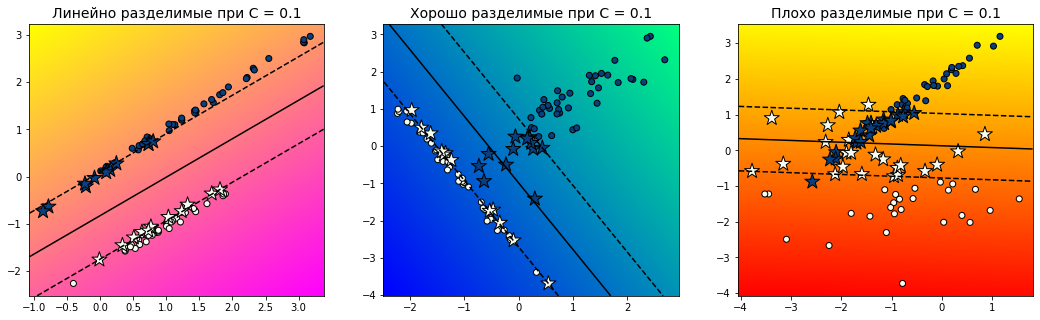

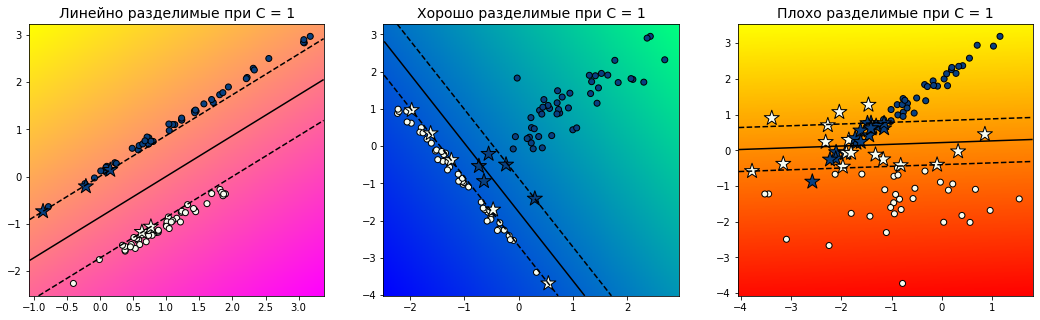

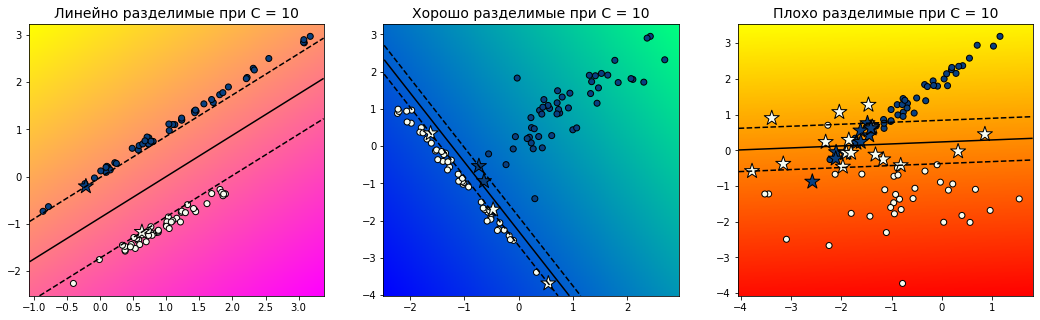

In [42]:
vec_1 = list()
vec_2 = list()
vec_3 = list()
param = [0.1, 1, 10]

for C in param:
    lin_model, good_model, bad_model = LinearSVM(C), LinearSVM(C), LinearSVM(C)

    lin_model.fit(X_1, y_1)
    good_model.fit(X_2, y_2)
    bad_model.fit(X_3, y_3)
    
    w_lin, w_good, w_bad = lin_model.weights_, good_model.weights_, bad_model.weights_
    b_lin, b_good, b_bad = lin_model.bias_, good_model.bias_, bad_model.bias_
    pen_lin, pen_good, pen_bad = lin_model.penalties_, good_model.penalties_, bad_model.penalties_
    X_sup_lin, X_sup_good, X_sup_bad = lin_model.support_vectors_, good_model.support_vectors_, bad_model.support_vectors_
    y_sup_lin, y_sup_good, y_sup_bad = lin_model.support_vectors_class_, good_model.support_vectors_class_, bad_model.support_vectors_class_
    
    vec_1.append(len(X_sup_lin))
    vec_2.append(len(X_sup_good))
    vec_3.append(len(X_sup_bad))
    
    fig, ax = plt.subplots(1, 3, figsize = (18, 5))
    
    ax[0].scatter(X_1[:, 0], X_1[:, 1], c = y_1, cmap='GnBu', edgecolor='black')
    ax[1].scatter(X_2[:, 0], X_2[:, 1], c = y_2, cmap='GnBu', edgecolor='black')
    ax[2].scatter(X_3[:, 0], X_3[:, 1], c = y_3, cmap='GnBu', edgecolor='black')
    
    x_10_lim, x_11_lim, x_12_lim = np.array(ax[0].get_ylim()), np.array(ax[1].get_ylim()), np.array(ax[2].get_ylim())
    ax[0].set_ylim(x_10_lim[0], x_10_lim[1])
    ax[1].set_ylim(x_11_lim[0], x_11_lim[1])
    ax[2].set_ylim(x_12_lim[0], x_12_lim[1])
    
    ax[0].scatter(X_sup_lin[:, 0], X_sup_lin[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_lin, s = 250, edgecolor='black')
    ax[1].scatter(X_sup_good[:, 0], X_sup_good[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_good, s = 250, edgecolor='black')
    ax[2].scatter(X_sup_bad[:, 0], X_sup_bad[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_bad, s = 250, edgecolor='black')
    
    x00_vals = np.linspace(ax[0].get_xlim()[0], ax[0].get_xlim()[1], 200)
    x01_vals = np.linspace(ax[1].get_xlim()[0], ax[1].get_xlim()[1], 200)
    x02_vals = np.linspace(ax[2].get_xlim()[0], ax[2].get_xlim()[1], 200)
    
    x10_vals = np.linspace(ax[0].get_ylim()[0], ax[0].get_ylim()[1], 200)
    x11_vals = np.linspace(ax[1].get_ylim()[0], ax[1].get_ylim()[1], 200)
    x12_vals = np.linspace(ax[2].get_ylim()[0], ax[2].get_ylim()[1], 200)

    xx0, yy0 = np.meshgrid(x00_vals, x10_vals)
    xx1, yy1 = np.meshgrid(x01_vals, x11_vals)
    xx2, yy2 = np.meshgrid(x02_vals, x12_vals)
    
    zz0 = np.reshape(lin_model.predict_proba(np.c_[xx0.ravel(), yy0.ravel()]), xx0.shape)
    zz1 = np.reshape(good_model.predict_proba(np.c_[xx1.ravel(), yy1.ravel()]), xx0.shape)
    zz2 = np.reshape(bad_model.predict_proba(np.c_[xx2.ravel(), yy2.ravel()]), xx0.shape)
    
    ax[0].contour(xx0, yy0, zz0, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    ax[1].contour(xx1, yy1, zz1, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    ax[2].contour(xx2, yy2, zz2, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    
    ax[0].pcolormesh(xx0, yy0, zz0, cmap='spring', shading = 'auto', zorder = 0)
    ax[1].pcolormesh(xx1, yy1, zz1, cmap='winter', shading = 'auto', zorder = 0)
    ax[2].pcolormesh(xx2, yy2, zz2, cmap='autumn', shading = 'auto', zorder = 0)

    ax[0].set_title('Линейно разделимые при C = {0}'.format(C), fontsize = 14)
    ax[1].set_title('Хорошо разделимые при C = {0}'.format(C), fontsize = 14)
    ax[2].set_title('Плохо разделимые при C = {0}'.format(C), fontsize = 14)

In [43]:
print('Линейно разделимая: \nЧисло опорных векторов', vec_1[0],'при C = {0}'.format(param[0]), \
      '\nЧисло опорных векторов', vec_1[1], 'при C = {0}'.format(param[1]), \
      '\nЧисло опорных векторов', vec_1[2],'при C = {0}'.format(param[2]), '\n\n' \
     'Хорошо разделимая: \nЧисло опорных векторов',vec_2[0], 'при C = {0}'.format(param[0]), \
     '\nЧисло опорных векторов', vec_2[1],'при C = {0}'.format(param[1]), \
      '\nЧисло опорных векторов', vec_2[2], 'при C = {0}'.format(param[2]), '\n\n' \
     'Плохо разделимая: \nЧисло опорных векторов', vec_3[0], 'при C = {0}'.format(param[0]), \
     '\nЧисло опорных векторов', vec_3[1], 'при C = {0}'.format(param[1]), \
      '\nЧисло опорных векторов', vec_3[2],'при C = {0}'.format(param[2]))

Линейно разделимая: 
Число опорных векторов 22 при C = 0.1 
Число опорных векторов 5 при C = 1 
Число опорных векторов 2 при C = 10 

Хорошо разделимая: 
Число опорных векторов 24 при C = 0.1 
Число опорных векторов 10 при C = 1 
Число опорных векторов 5 при C = 10 

Плохо разделимая: 
Число опорных векторов 45 при C = 0.1 
Число опорных векторов 35 при C = 1 
Число опорных векторов 27 при C = 10


Явное преобразование признаков

In [44]:
def Transformer(X):
    X_transf = np.zeros((X.shape[0], 5))
    X_transf[:, 0] = X[:, 0]
    X_transf[:, 1] = X[:, 1]
    X_transf[:, 2] = X[:, 0] * X[:, 0]
    X_transf[:, 3] = X[:, 0] * X[:, 1]
    X_transf[:, 4] = X[:, 1] * X[:, 1]
    return X_transf

SVM с квадратичной разделяющей поверхностью

     pcost       dcost       gap    pres   dres
 0: -4.0692e-01  1.1796e+01  3e+02  2e+00  2e+02
 1:  9.8247e+00 -4.0619e+00  1e+01  3e-02  4e+00
 2:  1.8105e+00  2.7492e-01  2e+00  2e-03  3e-01
 3:  8.1655e-01  4.3976e-01  4e-01  5e-04  6e-02
 4:  6.4784e-01  4.9639e-01  2e-01  1e-04  2e-02
 5:  5.7586e-01  5.1885e-01  6e-02  4e-05  5e-03
 6:  5.4718e-01  5.2864e-01  2e-02  1e-05  1e-03
 7:  5.3828e-01  5.3126e-01  7e-03  3e-06  4e-04
 8:  5.3613e-01  5.3256e-01  4e-03  4e-07  5e-05
 9:  5.3435e-01  5.3363e-01  7e-04  7e-08  8e-06
10:  5.3396e-01  5.3390e-01  6e-05  8e-10  9e-08
11:  5.3392e-01  5.3392e-01  7e-07  8e-12  1e-09
12:  5.3392e-01  5.3392e-01  7e-09  8e-14  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.9122e-02  2.1757e+01  6e+02  2e+00  2e+02
 1:  1.5630e+01 -1.2391e+01  3e+01  6e-02  6e+00
 2:  4.9240e+00  3.9423e-01  5e+00  2e-03  2e-01
 3:  1.5652e+00  8.9797e-01  7e-01  3e-04  3e-02
 4:  1.3797e+00  9.9525e-01  4e-01  1e-04  1e-0

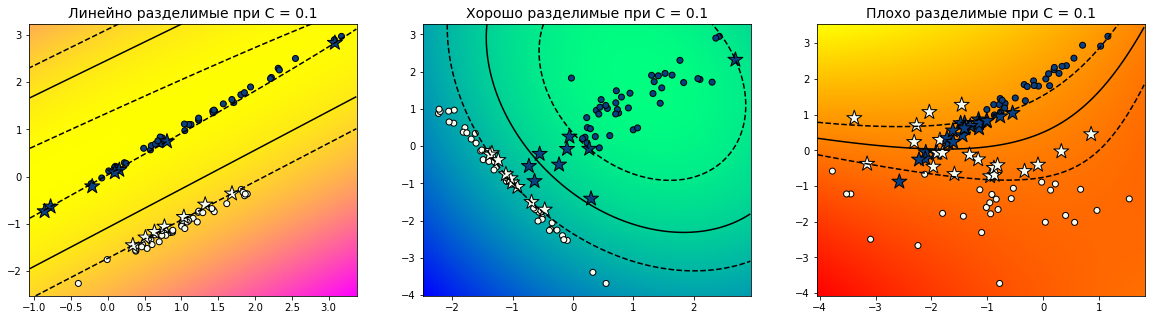

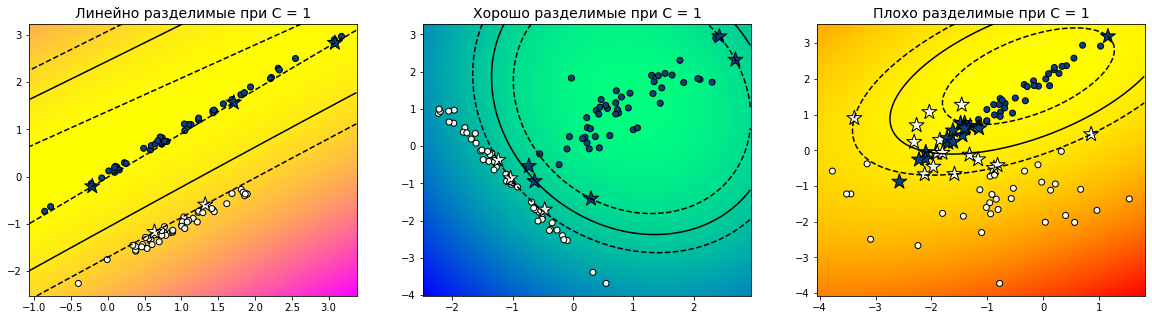

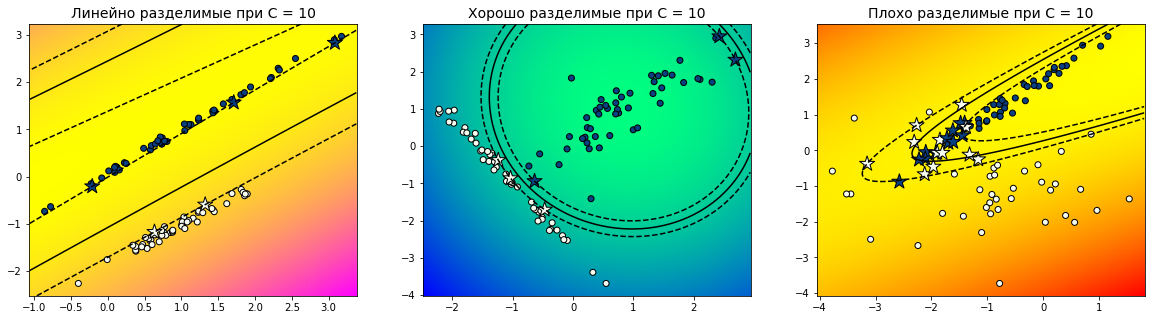

In [48]:
for C in param:
    lin_model, good_model, bad_model = LinearSVM(C), LinearSVM(C), LinearSVM(C)

    lin_model.fit(Transformer(X_1), y_1)
    good_model.fit(Transformer(X_2), y_2)
    bad_model.fit(Transformer(X_3), y_3)
    
    w_lin, w_good, w_bad = lin_model.weights_, good_model.weights_, bad_model.weights_
    b_lin, b_good, b_bad = lin_model.bias_, good_model.bias_, bad_model.bias_
    pen_lin, pen_good, pen_bad = lin_model.penalties_, good_model.penalties_, bad_model.penalties_
    X_sup_lin, X_sup_good, X_sup_bad = lin_model.support_vectors_, good_model.support_vectors_, bad_model.support_vectors_
    y_sup_lin, y_sup_good, y_sup_bad = lin_model.support_vectors_class_, good_model.support_vectors_class_, bad_model.support_vectors_class_
    
    fig, ax = plt.subplots(1, 3, figsize = (20, 5))
    
    ax[0].scatter(X_1[:, 0], X_1[:, 1], c = y_1, cmap='GnBu', edgecolor='black')
    ax[1].scatter(X_2[:, 0], X_2[:, 1], c = y_2, cmap='GnBu', edgecolor='black')
    ax[2].scatter(X_3[:, 0], X_3[:, 1], c = y_3, cmap='GnBu', edgecolor='black')
    
    x_10_lim, x_11_lim, x_12_lim = np.array(ax[0].get_ylim()), np.array(ax[1].get_ylim()), np.array(ax[2].get_ylim())
    ax[0].set_ylim(x_10_lim[0], x_10_lim[1])
    ax[1].set_ylim(x_11_lim[0], x_11_lim[1])
    ax[2].set_ylim(x_12_lim[0], x_12_lim[1])
    
    ax[0].scatter(X_sup_lin[:, 0], X_sup_lin[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_lin, s = 250, edgecolor='black')
    ax[1].scatter(X_sup_good[:, 0], X_sup_good[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_good, s = 250, edgecolor='black')
    ax[2].scatter(X_sup_bad[:, 0], X_sup_bad[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_bad, s = 250, edgecolor='black')
    
    x00_vals = np.linspace(ax[0].get_xlim()[0], ax[0].get_xlim()[1], 200)
    x01_vals = np.linspace(ax[1].get_xlim()[0], ax[1].get_xlim()[1], 200)
    x02_vals = np.linspace(ax[2].get_xlim()[0], ax[2].get_xlim()[1], 200)
    
    x10_vals = np.linspace(ax[0].get_ylim()[0], ax[0].get_ylim()[1], 200)
    x11_vals = np.linspace(ax[1].get_ylim()[0], ax[1].get_ylim()[1], 200)
    x12_vals = np.linspace(ax[2].get_ylim()[0], ax[2].get_ylim()[1], 200)

    xx0, yy0 = np.meshgrid(x00_vals, x10_vals)
    xx1, yy1 = np.meshgrid(x01_vals, x11_vals)
    xx2, yy2 = np.meshgrid(x02_vals, x12_vals)
    
    zz0 = np.reshape(lin_model.predict_proba(Transformer(np.c_[xx0.ravel(), yy0.ravel()])), xx0.shape)
    zz1 = np.reshape(good_model.predict_proba(Transformer(np.c_[xx1.ravel(), yy1.ravel()])), xx0.shape)
    zz2 = np.reshape(bad_model.predict_proba(Transformer(np.c_[xx2.ravel(), yy2.ravel()])), xx0.shape)
    
    ax[0].contour(xx0, yy0, zz0, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    ax[1].contour(xx1, yy1, zz1, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    ax[2].contour(xx2, yy2, zz2, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    
    ax[0].pcolormesh(xx0, yy0, zz0, cmap='spring', shading = 'auto', zorder = 0)
    ax[1].pcolormesh(xx1, yy1, zz1, cmap='winter', shading = 'auto', zorder = 0)
    ax[2].pcolormesh(xx2, yy2, zz2, cmap='autumn', shading = 'auto', zorder = 0)

    ax[0].set_title('Линейно разделимые при C = {0}'.format(C), fontsize = 14)
    ax[1].set_title('Хорошо разделимые при C = {0}'.format(C), fontsize = 14)
    ax[2].set_title('Плохо разделимые при C = {0}'.format(C), fontsize = 14)

# 3. Двойственный переход и Ядровой SVM

Задачу обучения линейного SVM, рассмотренную в предыдущем пункте принято называть _прямой_ оптимизационной задачей для SVM. Любая задача оптимизации с ограничениями имеет [_двойственную_ задачу Лагранжа](http://goo.gl/OujTPr), в которой оптимизируются _двойственные переменные_ (множители Лагранжа), соответствующие штрафу за нарушение ограничений, максимизируется нижняя оценка функционала прямой задачи. В случае задачи квадратичного программирования, решение двойственной задачи (значение оптимизируемого функционала) совпадает с оптимумом прямой задачи.

Подробнее можно почитать в [статье](./SMAIS11_SVM.pdf).

Двойственная задача для SVM имеет вид:
$$
\begin{gather}
    \sum_{n} \alpha_n - \frac{1}{2}\sum_{n}\sum_{n'} \alpha_{n}\alpha_{n'} y_{n}y_{n'} x_{n}^Tx_{n'} \to \max_{\alpha} \\
    \begin{aligned}
        \text{s.t. } \quad  
        & 0 \le \alpha_n \le C, \quad \forall n = 1, \dots, N \\
        & \sum_{n} \alpha_n y_n = 0
    \end{aligned}
\end{gather}
$$

Оптимизируется вектор из двойственных переменных $\alpha_n$, соответствующих объектам обучающей выборки. Объект $x_n$ является опорным, если $\alpha_n > 0$.

Предсказание вычисляется по следующему правилу:
$$\hat{y}(x) = \text{sign}\left(\sum_{n}\alpha_{n}y_{n}x^Tx_{n} + b\right).$$

Для предсказания необходимо оценить значение $b$. Известно, что для любого опорного объекта, который классифицируется безошибочно верно:
$$y_n = \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'} + b,$$
значит для любого такого объекта:
$$b = y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}.$$

В случае наличия ошибок классификации обучающей выборки, предлагается усреднять значение $b$ по всем опорным векторам:
$$b = \frac{1}{N_\text{SV}}\sum_{n \in \text{SV}}\left(y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}\right).$$
Интуиция здесь такова, что суммарные ошибки в положительную сторону примерно равны суммарным ошибкам в отрицательную сторону.

Другой вариант — отказаться от параметра $b$ и работать с моделью $f(x) = w^Tx$, добавив к вектору $x$ константный признак.

#### Неявное преобразование признаков
Отметим, что двойственная задача SVM содержит вектора признаков исключительно в виде скалярного произведения $x^Tx'$. Эта особенность позволяет производить неявное преобразование признакового пространства. Вместо вычисления функции $\phi(\boldsymbol x)$, которая может отображать исходные признаки в вектора очень большой размерности, будем вычислять скалярное произведение $k(\boldsymbol x, \boldsymbol x') = \phi(\boldsymbol x)^T\phi(\boldsymbol x')$ называемое _ядром_. 

#### Задание
  1. Реализуйте процедуру обучения ядрового SVM, используя QP-солвер.
  2. Протестируйте на случайных двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
    - линейная: $k(x, x') = x^Tx'$
    - полиномиальная: $k(x, x') = (x^Tx' + 1)^p$ с различными степенями $p = 2,3,\dots$
    - Гауссовская-RBF: $k(x, x') = \exp(-\frac{1}{2\gamma}\|x - x'\|^2)$
  3. Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $p$?
  4. Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\gamma$? Поварьируйте параметры $C$ и $\gamma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

In [52]:
from sklearn.base import BaseEstimator
from cvxopt import matrix
from cvxopt import solvers

class DualSVM(BaseEstimator):
    def __init__(self, C, kernel=None):
        self.C = C
        self.kernel = kernel
        
    def QP_solver(self, X, y):
        dim = X.shape[1]
        N = X.shape[0]
        
        XX = np.zeros((N, N))
        for i in range(N):
            for j in range(N):
                XX[i, j] = self.kernel(X[i, :], X[j, :])
        y_ = np.repeat(y, N).reshape(N, N)
        yy = y * y_
        P = matrix(yy * XX, tc = 'd')
        
        q = matrix(-np.ones(N), tc = 'd')
        G = matrix(np.vstack([np.eye(N), -np.eye(N)]), tc = 'd')
        h = matrix(np.hstack([self.C * np.ones(N), np.zeros(N)]), tc = 'd')
        A = matrix(y, (1, N), tc = 'd')
        b = matrix(0, tc = 'd')
        
        sol = solvers.qp(P,q,G,h,A,b)
        res = sol['x']
        return res
        
    def fit(self, X, y):
        """
        Функция обучения модели.
        """
        dim = X.shape[1]
        N = X.shape[0]
        res = self.QP_solver(X, y)
        self.alpha_ = np.round(res, 8).ravel()
        
        mask = (self.alpha_ != 0) & (self.alpha_ != self.C)
        mask = mask.ravel()
        self.support_vectors_ = X[mask]
        self.support_vectors_alpha_ = self.alpha_[mask]
        self.support_vectors_class_ = y[mask]
        N_ = self.support_vectors_.shape[0]
        xx = np.zeros((N_, N_))
        for i in range(N_):
            for j in range(N_):
                xx[i, j] = self.kernel(self.support_vectors_[i, :], self.support_vectors_[j, :])
        self.bias_ = np.mean(self.support_vectors_class_ - np.sum(np.repeat(self.support_vectors_alpha_ * \
                                                                            self.support_vectors_class_, N_).reshape(N_, N_).T \
                                                                  * xx, axis = 1))
    
    def predict_proba(self, X):
        N = X.shape[0]
        N_ = self.support_vectors_.shape[0]
        XX = np.zeros((N_, N))
        for i in range(N_):
            for j in range(N):
                XX[i, j] = self.kernel(self.support_vectors_[i, :], X[j, :])
        alpha_y = self.support_vectors_alpha_ * self.support_vectors_class_
        alpha_y = np.repeat(alpha_y, N).reshape(N_, N)
        return np.sum(alpha_y * XX, axis = 0) + self.bias_  
    
    def predict(self, X):
        return np.sign(self.predict_proba(X))

Три сгенерированные выборки

Text(0.5, 1.0, 'Модель 3')

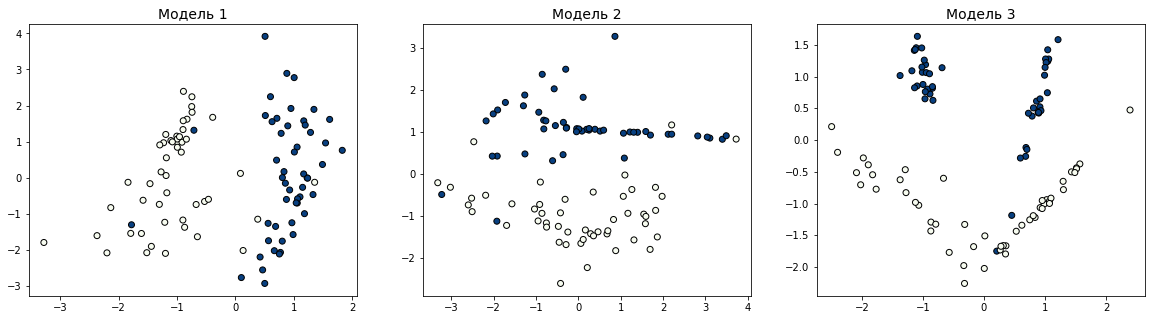

In [55]:
X1, y1 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes = 2, n_clusters_per_class=2, \
                             random_state=40)
y1 = y1 * 2 - 1

X2, y2 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes = 2, n_clusters_per_class=2, \
                               random_state=55)
y2 = y2 * 2 - 1

X3, y3 = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes = 2, n_clusters_per_class=2, \
                               random_state=22)
y3 = y3 * 2 - 1

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].scatter(X1[:, 0], X1[:, 1], c = y1, cmap='GnBu', edgecolor='black')
ax[1].scatter(X2[:, 0], X2[:, 1], c = y2, cmap='GnBu', edgecolor='black')
ax[2].scatter(X3[:, 0], X3[:, 1], c = y3, cmap='GnBu', edgecolor='black')
ax[0].set_title('Модель 1', fontsize = 14)
ax[1].set_title('Модель 2', fontsize = 14)
ax[2].set_title('Модель 3', fontsize = 14)

Ядровые функции

In [56]:
p, g = 2, 1
LinearKernel = lambda x1, x2 : x1 @ x2.T
PolyKernel = lambda x1, x2 : (x1 @ x2.T + 1) ** p
RBFKernel = lambda x1, x2 : np.exp(-1 / (2 * g) * np.linalg.norm(x1 - x2) ** 2)

Ядровой SVM на выборках

     pcost       dcost       gap    pres   dres
 0: -3.3179e+01 -2.5067e+02  1e+03  3e+00  3e-15
 1: -1.8937e+01 -1.6128e+02  2e+02  3e-01  3e-15
 2: -1.4617e+01 -3.8003e+01  3e+01  1e-02  3e-15
 3: -1.7115e+01 -2.4955e+01  8e+00  3e-03  2e-15
 4: -1.7881e+01 -2.3694e+01  6e+00  2e-03  2e-15
 5: -1.8804e+01 -2.2048e+01  3e+00  1e-03  2e-15
 6: -1.9199e+01 -2.1511e+01  2e+00  5e-04  3e-15
 7: -1.9604e+01 -2.0780e+01  1e+00  1e-04  3e-15
 8: -1.9874e+01 -2.0359e+01  5e-01  4e-05  3e-15
 9: -1.9992e+01 -2.0182e+01  2e-01  7e-06  3e-15
10: -2.0073e+01 -2.0078e+01  5e-03  1e-07  3e-15
11: -2.0075e+01 -2.0075e+01  5e-05  1e-09  3e-15
12: -2.0075e+01 -2.0075e+01  5e-07  1e-11  4e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1269e+01 -2.4615e+02  1e+03  3e+00  4e-15
 1: -1.8462e+01 -1.5565e+02  2e+02  3e-01  5e-15
 2: -1.3428e+01 -3.9461e+01  3e+01  3e-02  6e-15
 3: -1.5959e+01 -2.2927e+01  8e+00  6e-03  3e-15
 4: -1.7063e+01 -2.0791e+01  4e+00  3e-03  3e-1

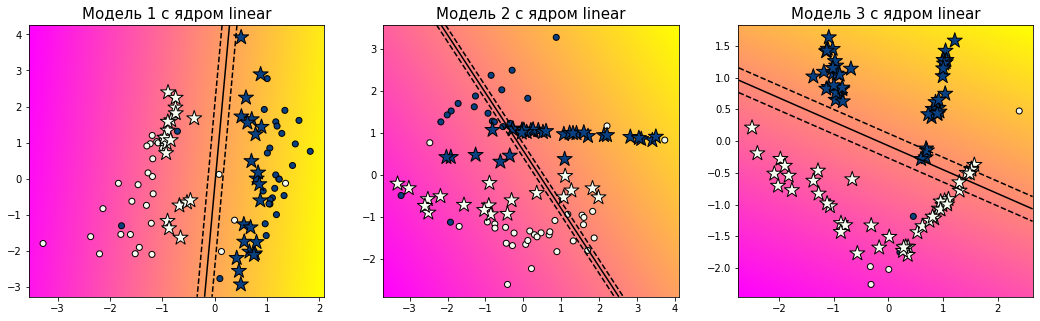

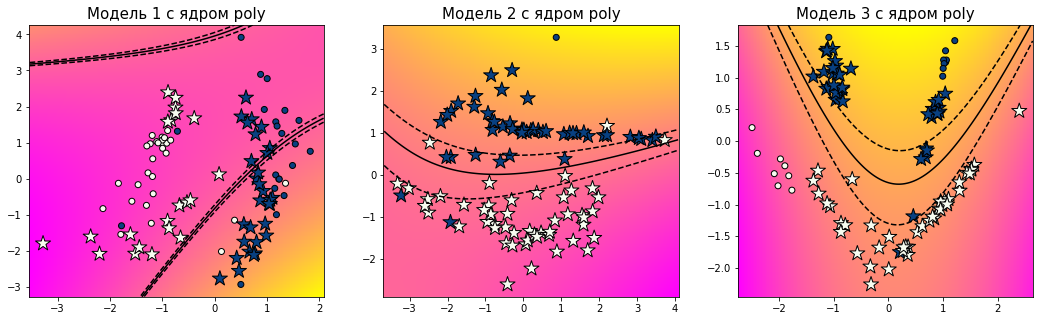

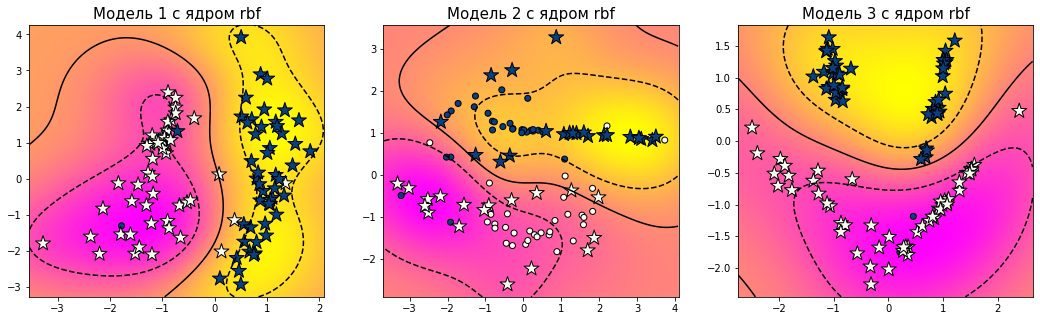

In [59]:
kernels = [LinearKernel, PolyKernel, RBFKernel]
kernels_names = ['linear', 'poly', 'rbf']

for i, kernel in enumerate(kernels):
    model1, model2, model3 = DualSVM(C = 1, kernel = kernel), DualSVM(C = 1, kernel = kernel), DualSVM(C = 1, kernel = kernel)

    model1.fit(X1, y1)
    model2.fit(X2, y2)
    model3.fit(X3, y3)
    
    alpha1, alpha2, alpha3 = model1.alpha_, model2.alpha_, model3.alpha_
    b1, b2, b3 = model1.bias_, model2.bias_, model3.bias_
    X_sup_1, X_sup_2, X_sup_3 = model1.support_vectors_, model2.support_vectors_, model3.support_vectors_
    y_sup_1, y_sup_2, y_sup_3 = model1.support_vectors_class_, model2.support_vectors_class_, model3.support_vectors_class_
    
    fig, ax = plt.subplots(1, 3, figsize = (18, 5))
    
    ax[0].scatter(X1[:, 0], X1[:, 1], c = y1, cmap='GnBu', edgecolor='black')
    ax[1].scatter(X2[:, 0], X2[:, 1], c = y2, cmap='GnBu', edgecolor='black')
    ax[2].scatter(X3[:, 0], X3[:, 1], c = y3, cmap='GnBu', edgecolor='black')
    
    x_10_lim, x_11_lim, x_12_lim = np.array(ax[0].get_ylim()), np.array(ax[1].get_ylim()), np.array(ax[2].get_ylim())
    ax[0].set_ylim(x_10_lim[0], x_10_lim[1])
    ax[1].set_ylim(x_11_lim[0], x_11_lim[1])
    ax[2].set_ylim(x_12_lim[0], x_12_lim[1])
    
    ax[0].scatter(X_sup_1[:, 0], X_sup_1[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_1, s = 250, edgecolor='black')
    ax[1].scatter(X_sup_2[:, 0], X_sup_2[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_2, s = 250, edgecolor='black')
    ax[2].scatter(X_sup_3[:, 0], X_sup_3[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_3, s = 250, edgecolor='black')
    
    x00_vals = np.linspace(ax[0].get_xlim()[0], ax[0].get_xlim()[1], 200)
    x01_vals = np.linspace(ax[1].get_xlim()[0], ax[1].get_xlim()[1], 200)
    x02_vals = np.linspace(ax[2].get_xlim()[0], ax[2].get_xlim()[1], 200)
    
    x10_vals = np.linspace(ax[0].get_ylim()[0], ax[0].get_ylim()[1], 200)
    x11_vals = np.linspace(ax[1].get_ylim()[0], ax[1].get_ylim()[1], 200)
    x12_vals = np.linspace(ax[2].get_ylim()[0], ax[2].get_ylim()[1], 200)

    xx0, yy0 = np.meshgrid(x00_vals, x10_vals)
    xx1, yy1 = np.meshgrid(x01_vals, x11_vals)
    xx2, yy2 = np.meshgrid(x02_vals, x12_vals)
    
    zz0 = np.reshape(model1.predict_proba(np.c_[xx0.ravel(), yy0.ravel()]), xx0.shape)
    zz1 = np.reshape(model2.predict_proba(np.c_[xx1.ravel(), yy1.ravel()]), xx0.shape)
    zz2 = np.reshape(model3.predict_proba(np.c_[xx2.ravel(), yy2.ravel()]), xx0.shape)
    
    ax[0].contour(xx0, yy0, zz0, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    ax[1].contour(xx1, yy1, zz1, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    ax[2].contour(xx2, yy2, zz2, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    
    ax[0].pcolormesh(xx0, yy0, zz0, cmap='spring', shading = 'auto', zorder = 0)
    ax[1].pcolormesh(xx1, yy1, zz1, cmap='spring', shading = 'auto', zorder = 0)
    ax[2].pcolormesh(xx2, yy2, zz2, cmap='spring', shading = 'auto', zorder = 0)

    ax[0].set_title('Модель 1 с ядром {0}'.format(kernels_names[i]), fontsize = 15)
    ax[1].set_title('Модель 2 с ядром {0}'.format(kernels_names[i]), fontsize = 15)
    ax[2].set_title('Модель 3 с ядром {0}'.format(kernels_names[i]), fontsize = 15)

SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $p$

In [60]:
params = [0.1, 1, 10]
power = [2, 3, 4]

     pcost       dcost       gap    pres   dres
 0: -1.5330e+01 -2.1930e+01  8e+02  3e+01  7e-15
 1: -2.3414e+00 -2.0481e+01  4e+01  8e-01  7e-15
 2: -1.6102e+00 -7.6231e+00  7e+00  7e-02  2e-15
 3: -1.7935e+00 -2.9512e+00  1e+00  1e-02  2e-15
 4: -2.0156e+00 -2.4156e+00  4e-01  3e-03  2e-15
 5: -2.1198e+00 -2.2115e+00  9e-02  6e-04  2e-15
 6: -2.1472e+00 -2.1642e+00  2e-02  7e-05  2e-15
 7: -2.1534e+00 -2.1558e+00  2e-03  8e-06  3e-15
 8: -2.1544e+00 -2.1545e+00  1e-04  3e-07  2e-15
 9: -2.1545e+00 -2.1545e+00  3e-06  7e-09  2e-15
10: -2.1545e+00 -2.1545e+00  7e-08  9e-11  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6784e+01 -2.0573e+01  7e+02  3e+01  2e-14
 1: -2.9824e+00 -1.9162e+01  5e+01  1e+00  3e-14
 2: -1.5980e+00 -1.0282e+01  1e+01  1e-01  5e-15
 3: -1.7458e+00 -3.1709e+00  2e+00  2e-02  5e-15
 4: -1.9966e+00 -2.4261e+00  5e-01  4e-03  3e-15
 5: -2.0826e+00 -2.2432e+00  2e-01  3e-04  5e-15
 6: -2.1147e+00 -2.1749e+00  6e-02  1e-04  4e-1

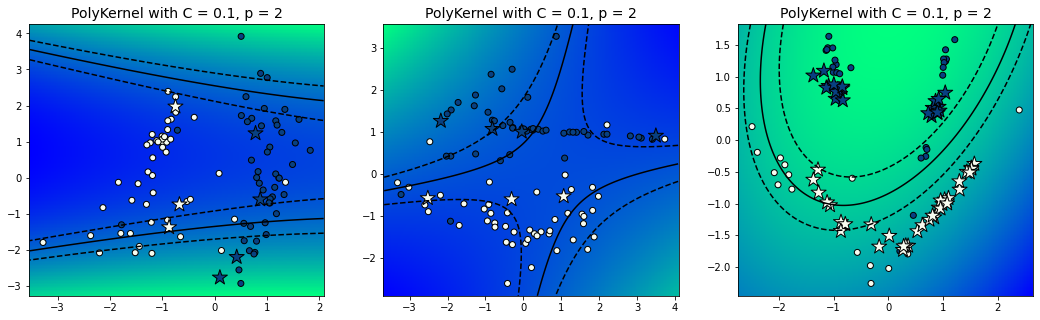

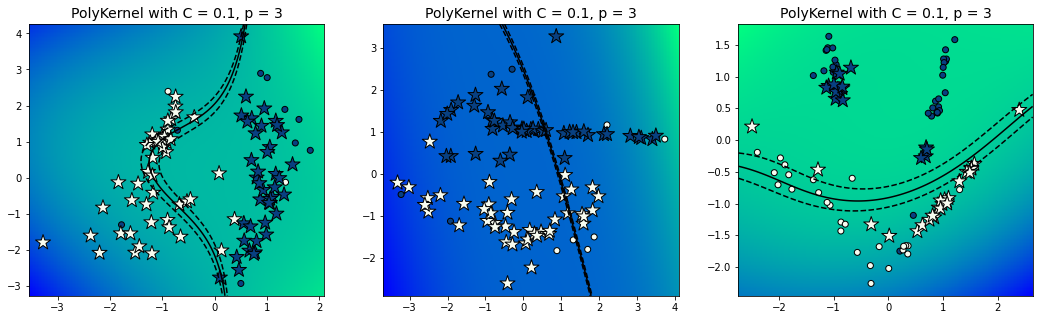

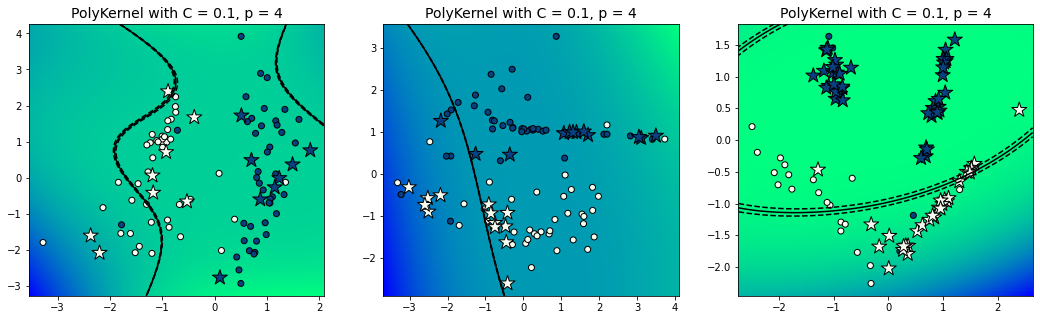

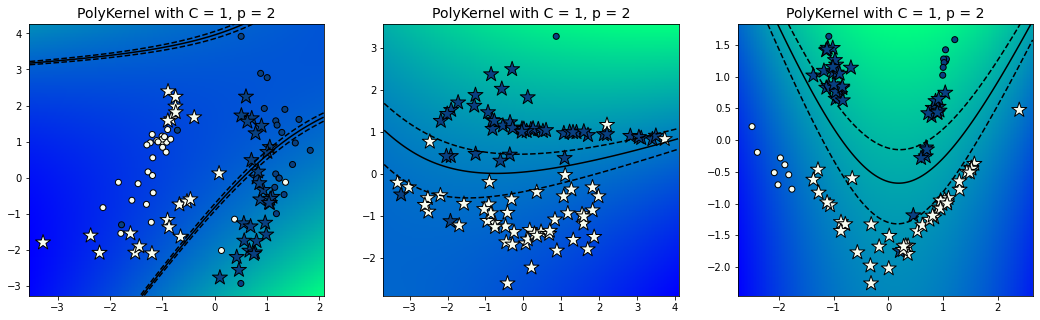

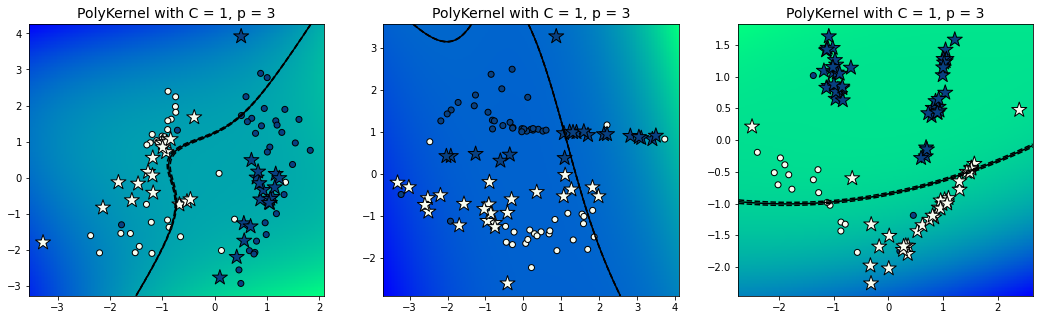

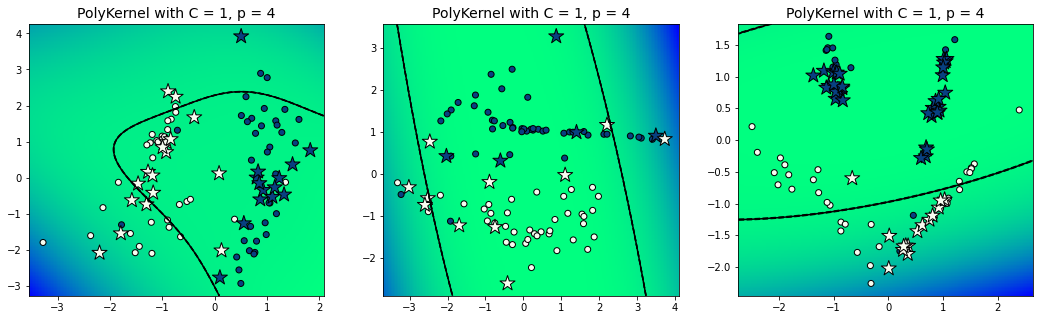

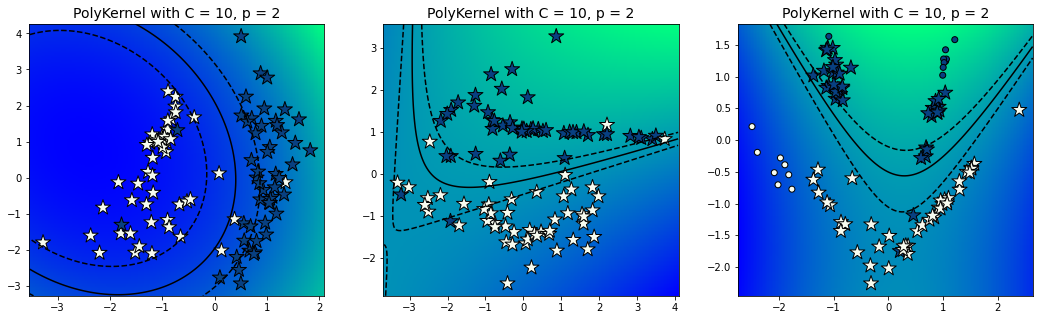

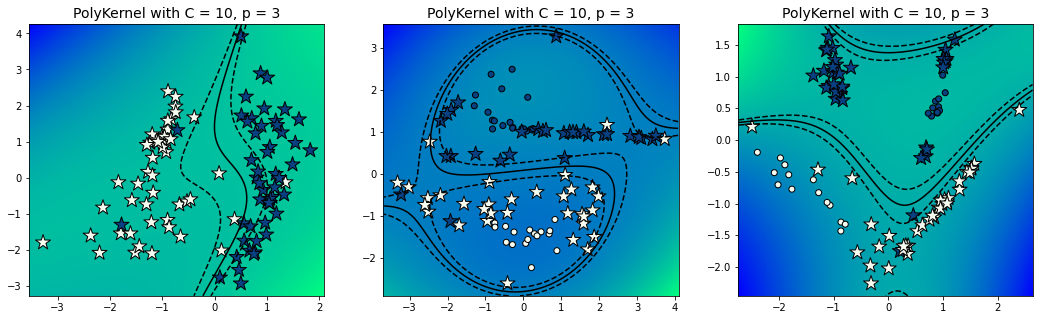

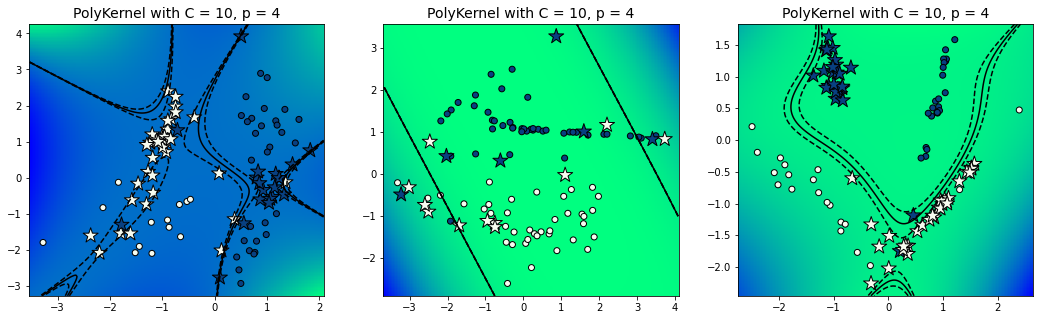

In [63]:
for C in params:
    for p in power:
        PolyKernel = lambda x1, x2 : (x1 @ x2.T + 1) ** p
        model1, model2, model3 = DualSVM(C = C, kernel = PolyKernel), DualSVM(C = C, kernel = PolyKernel), DualSVM(C = C, kernel = PolyKernel)

        model1.fit(X1, y1)
        model2.fit(X2, y2)
        model3.fit(X3, y3)

        alpha1, alpha2, alpha3 = model1.alpha_, model2.alpha_, model3.alpha_
        b1, b2, b3 = model1.bias_, model2.bias_, model3.bias_
        X_sup_1, X_sup_2, X_sup_3 = model1.support_vectors_, model2.support_vectors_, model3.support_vectors_
        y_sup_1, y_sup_2, y_sup_3 = model1.support_vectors_class_, model2.support_vectors_class_, model3.support_vectors_class_

        fig, ax = plt.subplots(1, 3, figsize = (18, 5))

        ax[0].scatter(X1[:, 0], X1[:, 1], c = y1, cmap='GnBu', edgecolor='black')
        ax[1].scatter(X2[:, 0], X2[:, 1], c = y2, cmap='GnBu', edgecolor='black')
        ax[2].scatter(X3[:, 0], X3[:, 1], c = y3, cmap='GnBu', edgecolor='black')

        x_10_lim, x_11_lim, x_12_lim = np.array(ax[0].get_ylim()), np.array(ax[1].get_ylim()), np.array(ax[2].get_ylim())
        ax[0].set_ylim(x_10_lim[0], x_10_lim[1])
        ax[1].set_ylim(x_11_lim[0], x_11_lim[1])
        ax[2].set_ylim(x_12_lim[0], x_12_lim[1])

        ax[0].scatter(X_sup_1[:, 0], X_sup_1[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_1, s = 250, edgecolor='black')
        ax[1].scatter(X_sup_2[:, 0], X_sup_2[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_2, s = 250, edgecolor='black')
        ax[2].scatter(X_sup_3[:, 0], X_sup_3[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_3, s = 250, edgecolor='black')

        x00_vals = np.linspace(ax[0].get_xlim()[0], ax[0].get_xlim()[1], 200)
        x01_vals = np.linspace(ax[1].get_xlim()[0], ax[1].get_xlim()[1], 200)
        x02_vals = np.linspace(ax[2].get_xlim()[0], ax[2].get_xlim()[1], 200)

        x10_vals = np.linspace(ax[0].get_ylim()[0], ax[0].get_ylim()[1], 200)
        x11_vals = np.linspace(ax[1].get_ylim()[0], ax[1].get_ylim()[1], 200)
        x12_vals = np.linspace(ax[2].get_ylim()[0], ax[2].get_ylim()[1], 200)

        xx0, yy0 = np.meshgrid(x00_vals, x10_vals)
        xx1, yy1 = np.meshgrid(x01_vals, x11_vals)
        xx2, yy2 = np.meshgrid(x02_vals, x12_vals)

        zz0 = np.reshape(model1.predict_proba(np.c_[xx0.ravel(), yy0.ravel()]), xx0.shape)
        zz1 = np.reshape(model2.predict_proba(np.c_[xx1.ravel(), yy1.ravel()]), xx0.shape)
        zz2 = np.reshape(model3.predict_proba(np.c_[xx2.ravel(), yy2.ravel()]), xx0.shape)

        ax[0].contour(xx0, yy0, zz0, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
        ax[1].contour(xx1, yy1, zz1, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
        ax[2].contour(xx2, yy2, zz2, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)

        ax[0].pcolormesh(xx0, yy0, zz0, cmap='winter', shading = 'auto', zorder = 0)
        ax[1].pcolormesh(xx1, yy1, zz1, cmap='winter', shading = 'auto', zorder = 0)
        ax[2].pcolormesh(xx2, yy2, zz2, cmap='winter', shading = 'auto', zorder = 0)

        ax[0].set_title('PolyKernel with C = {0}, p = {1}'.format(C, p), fontsize = 14)
        ax[1].set_title('PolyKernel with C = {0}, p = {1}'.format(C, p), fontsize = 14)
        ax[2].set_title('PolyKernel with C = {0}, p = {1}'.format(C, p), fontsize = 14)

SVM с RBF-ядром в зависимости от параметров $C$ и $\gamma$

In [64]:
params = [0.1, 1, 10]
gamma = [0.1, 1, 10]

     pcost       dcost       gap    pres   dres
 0: -1.7141e+01 -2.4334e+01  6e+02  2e+01  6e-16
 1: -8.3462e+00 -2.1144e+01  3e+01  6e-01  5e-16
 2: -7.1400e+00 -1.0446e+01  3e+00  6e-16  1e-15
 3: -7.6838e+00 -7.9760e+00  3e-01  2e-16  5e-16
 4: -7.8041e+00 -7.8209e+00  2e-02  2e-16  4e-16
 5: -7.8151e+00 -7.8158e+00  7e-04  3e-16  4e-16
 6: -7.8157e+00 -7.8157e+00  1e-05  7e-16  5e-16
 7: -7.8157e+00 -7.8157e+00  1e-07  5e-16  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6656e+01 -2.3072e+01  5e+02  2e+01  5e-16
 1: -8.6075e+00 -1.9760e+01  2e+01  6e-01  6e-16
 2: -7.4137e+00 -1.0110e+01  3e+00  2e-16  8e-16
 3: -7.9382e+00 -8.1152e+00  2e-01  2e-16  5e-16
 4: -8.0270e+00 -8.0310e+00  4e-03  2e-16  4e-16
 5: -8.0298e+00 -8.0298e+00  4e-05  3e-16  3e-16
 6: -8.0298e+00 -8.0298e+00  4e-07  2e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.7928e+00 -2.3875e+01  7e+02  3e+01  4e-16
 1: -5.9349e+00 -2.1975e

/tmp/ipykernel_5495/2426525501.py:46: UserWarning: No contour levels were found within the data range.
  ax[0].contour(xx0, yy0, zz0, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)


     pcost       dcost       gap    pres   dres
 0: -2.2610e+01 -1.9324e+02  7e+02  2e+00  9e-16
 1: -1.9120e+01 -1.1026e+02  9e+01  5e-15  5e-16
 2: -2.2232e+01 -3.4413e+01  1e+01  1e-16  5e-16
 3: -2.3628e+01 -2.6288e+01  3e+00  2e-15  4e-16
 4: -2.4088e+01 -2.4652e+01  6e-01  2e-15  3e-16
 5: -2.4209e+01 -2.4269e+01  6e-02  3e-15  3e-16
 6: -2.4225e+01 -2.4229e+01  5e-03  8e-16  4e-16
 7: -2.4226e+01 -2.4226e+01  1e-04  2e-15  5e-16
 8: -2.4226e+01 -2.4226e+01  4e-06  2e-15  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1264e+01 -1.6565e+02  5e+02  1e+00  8e-16
 1: -1.9396e+01 -8.6619e+01  7e+01  3e-16  4e-16
 2: -2.2610e+01 -3.0573e+01  8e+00  2e-16  4e-16
 3: -2.3699e+01 -2.4925e+01  1e+00  4e-16  3e-16
 4: -2.3928e+01 -2.4230e+01  3e-01  7e-16  3e-16
 5: -2.3988e+01 -2.4058e+01  7e-02  3e-16  3e-16
 6: -2.4002e+01 -2.4011e+01  9e-03  4e-16  3e-16
 7: -2.4004e+01 -2.4005e+01  1e-03  1e-15  3e-16
 8: -2.4004e+01 -2.4004e+01  4e-05  2e-15  3e-1

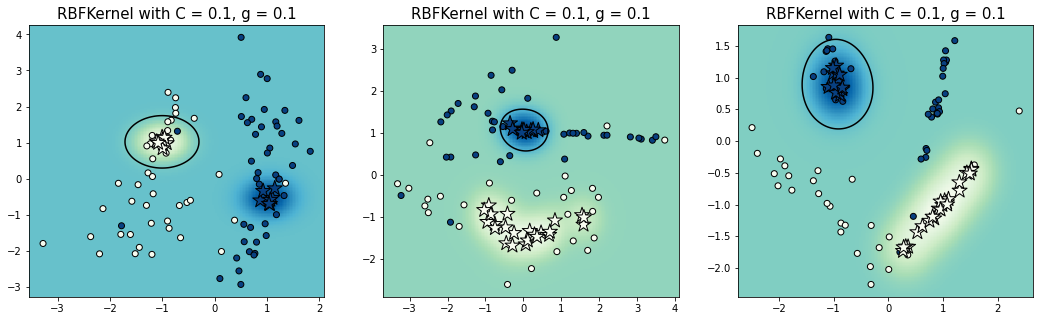

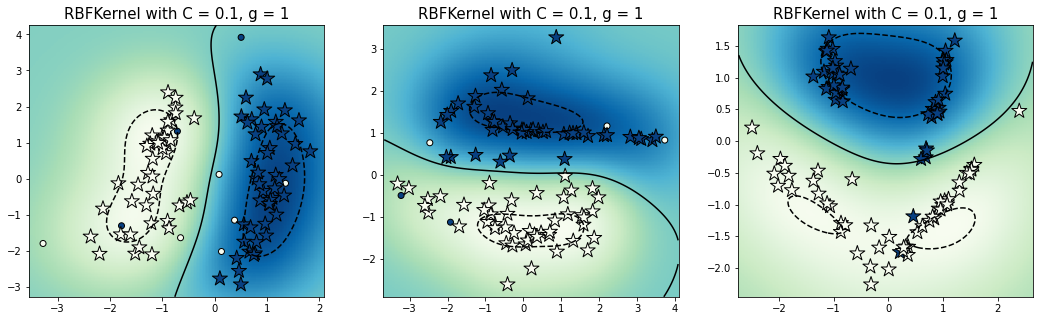

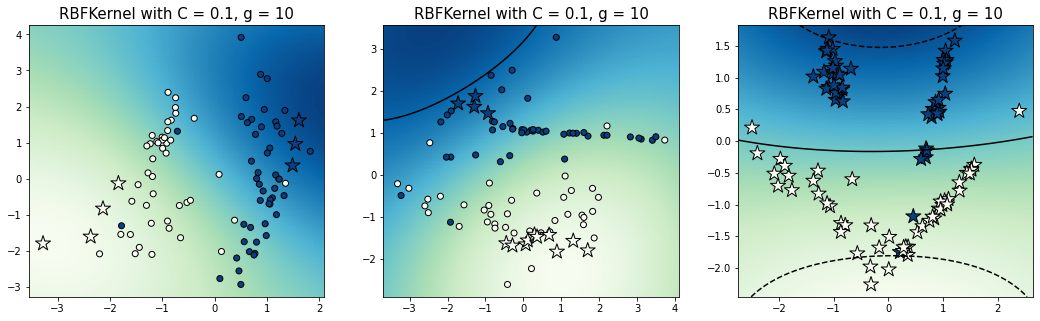

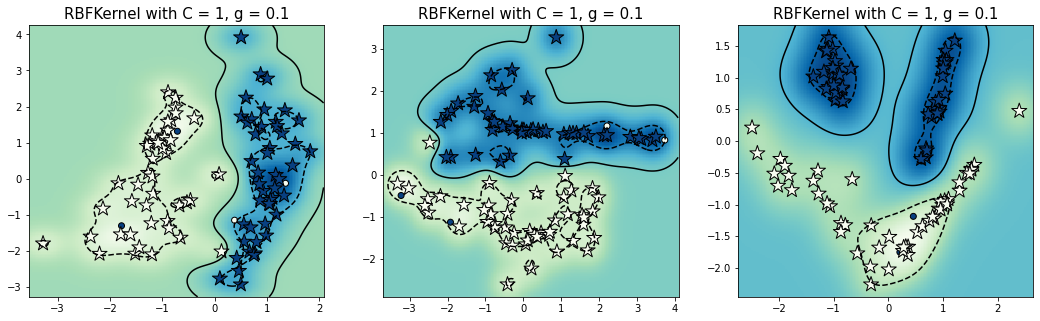

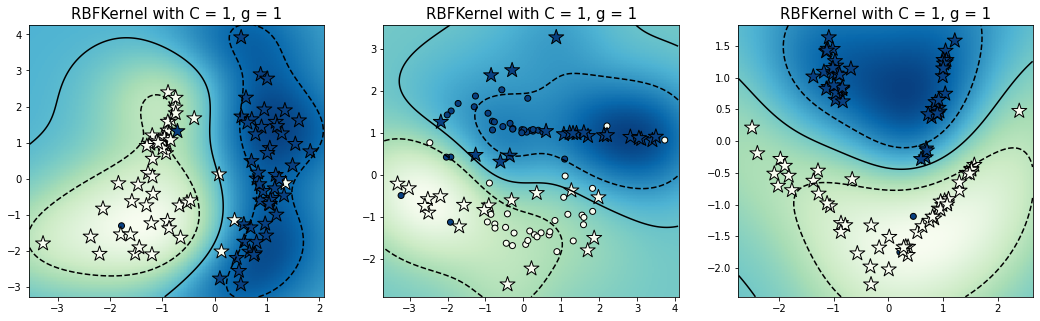

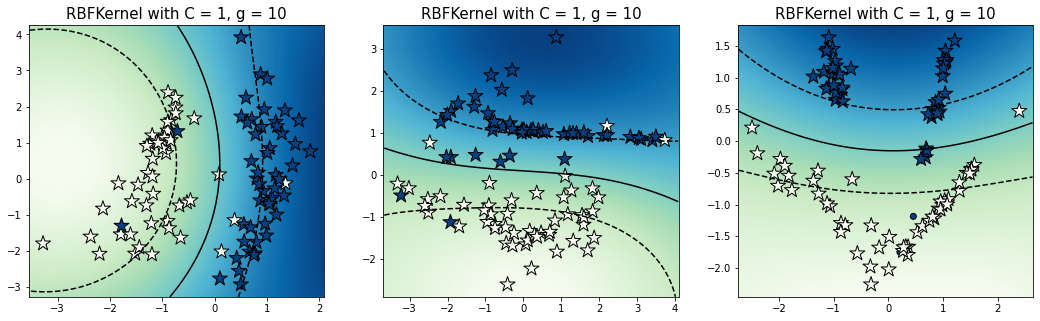

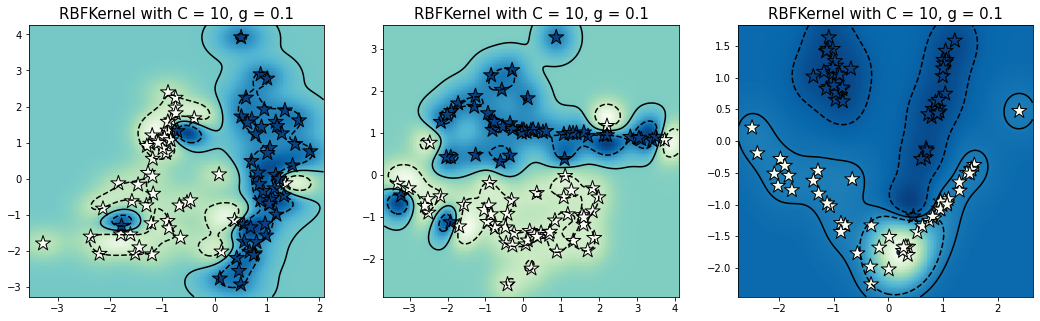

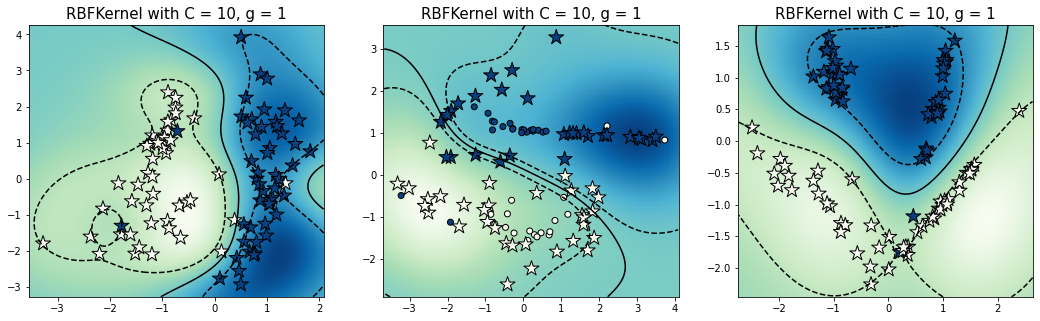

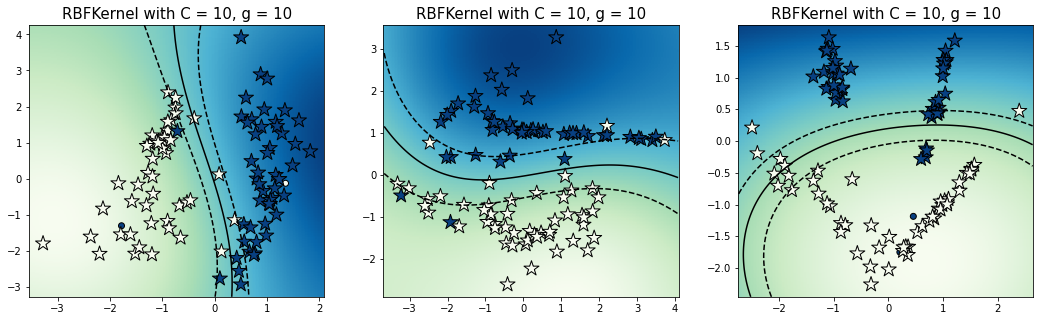

In [66]:
for C in params:
    for g in gamma:
        RBFKernel = lambda x1, x2 : np.exp(-1 / (2 * g) * np.linalg.norm(x1 - x2) ** 2)
        model1, model2, model3 = DualSVM(C = C, kernel = RBFKernel), DualSVM(C = C, kernel = RBFKernel), DualSVM(C = C, kernel = RBFKernel)

        model1.fit(X1, y1)
        model2.fit(X2, y2)
        model3.fit(X3, y3)

        alpha1, alpha2, alpha3 = model1.alpha_, model2.alpha_, model3.alpha_
        b1, b2, b3 = model1.bias_, model2.bias_, model3.bias_
        X_sup_1, X_sup_2, X_sup_3 = model1.support_vectors_, model2.support_vectors_, model3.support_vectors_
        y_sup_1, y_sup_2, y_sup_3 = model1.support_vectors_class_, model2.support_vectors_class_, model3.support_vectors_class_

        fig, ax = plt.subplots(1, 3, figsize = (18, 5))

        ax[0].scatter(X1[:, 0], X1[:, 1], c = y1, cmap='GnBu', edgecolor='black')
        ax[1].scatter(X2[:, 0], X2[:, 1], c = y2, cmap='GnBu', edgecolor='black')
        ax[2].scatter(X3[:, 0], X3[:, 1], c = y3, cmap='GnBu', edgecolor='black')

        x_10_lim, x_11_lim, x_12_lim = np.array(ax[0].get_ylim()), np.array(ax[1].get_ylim()), np.array(ax[2].get_ylim())
        ax[0].set_ylim(x_10_lim[0], x_10_lim[1])
        ax[1].set_ylim(x_11_lim[0], x_11_lim[1])
        ax[2].set_ylim(x_12_lim[0], x_12_lim[1])

        ax[0].scatter(X_sup_1[:, 0], X_sup_1[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_1, s = 250, edgecolor='black')
        ax[1].scatter(X_sup_2[:, 0], X_sup_2[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_2, s = 250, edgecolor='black')
        ax[2].scatter(X_sup_3[:, 0], X_sup_3[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_3, s = 250, edgecolor='black')

        x00_vals = np.linspace(ax[0].get_xlim()[0], ax[0].get_xlim()[1], 200)
        x01_vals = np.linspace(ax[1].get_xlim()[0], ax[1].get_xlim()[1], 200)
        x02_vals = np.linspace(ax[2].get_xlim()[0], ax[2].get_xlim()[1], 200)

        x10_vals = np.linspace(ax[0].get_ylim()[0], ax[0].get_ylim()[1], 200)
        x11_vals = np.linspace(ax[1].get_ylim()[0], ax[1].get_ylim()[1], 200)
        x12_vals = np.linspace(ax[2].get_ylim()[0], ax[2].get_ylim()[1], 200)

        xx0, yy0 = np.meshgrid(x00_vals, x10_vals)
        xx1, yy1 = np.meshgrid(x01_vals, x11_vals)
        xx2, yy2 = np.meshgrid(x02_vals, x12_vals)

        zz0 = np.reshape(model1.predict_proba(np.c_[xx0.ravel(), yy0.ravel()]), xx0.shape)
        zz1 = np.reshape(model2.predict_proba(np.c_[xx1.ravel(), yy1.ravel()]), xx0.shape)
        zz2 = np.reshape(model3.predict_proba(np.c_[xx2.ravel(), yy2.ravel()]), xx0.shape)

        ax[0].contour(xx0, yy0, zz0, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
        ax[1].contour(xx1, yy1, zz1, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
        ax[2].contour(xx2, yy2, zz2, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)

        ax[0].pcolormesh(xx0, yy0, zz0, cmap='GnBu', shading = 'auto', zorder = 0)
        ax[1].pcolormesh(xx1, yy1, zz1, cmap='GnBu', shading = 'auto', zorder = 0)
        ax[2].pcolormesh(xx2, yy2, zz2, cmap='GnBu', shading = 'auto', zorder = 0)

        ax[0].set_title('RBFKernel with C = {0}, g = {1}'.format(C, g), fontsize = 15)
        ax[1].set_title('RBFKernel with C = {0}, g = {1}'.format(C, g), fontsize = 15)
        ax[2].set_title('RBFKernel with C = {0}, g = {1}'.format(C, g), fontsize = 15)

Параметры $C$ и $\gamma$ на логарифмической сетке

In [67]:
params = np.logspace(-1, 2, 5)
gamma = np.logspace(-1, 2, 5)

Варьирование параметра $C$ при $\gamma = 1$

     pcost       dcost       gap    pres   dres
 0: -1.4685e+01 -2.3253e+01  7e+02  3e+01  5e-16
 1: -4.5930e+00 -2.1841e+01  2e+01  2e-01  8e-16
 2: -4.5934e+00 -6.1412e+00  2e+00  7e-03  5e-16
 3: -4.8275e+00 -5.1422e+00  3e-01  1e-03  4e-16
 4: -4.9237e+00 -4.9903e+00  7e-02  2e-04  5e-16
 5: -4.9451e+00 -4.9667e+00  2e-02  4e-05  5e-16
 6: -4.9524e+00 -4.9577e+00  5e-03  1e-05  3e-16
 7: -4.9546e+00 -4.9553e+00  7e-04  9e-07  5e-16
 8: -4.9549e+00 -4.9549e+00  3e-05  1e-08  4e-16
 9: -4.9549e+00 -4.9549e+00  7e-07  2e-10  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3290e+01 -2.2228e+01  7e+02  3e+01  4e-16
 1: -4.2863e+00 -2.0963e+01  2e+01  2e-01  7e-16
 2: -4.4375e+00 -6.7427e+00  2e+00  2e-02  5e-16
 3: -4.8219e+00 -5.1789e+00  4e-01  2e-03  4e-16
 4: -4.9228e+00 -5.0250e+00  1e-01  5e-04  4e-16
 5: -4.9519e+00 -4.9941e+00  4e-02  2e-04  4e-16
 6: -4.9644e+00 -4.9801e+00  2e-02  6e-05  3e-16
 7: -4.9706e+00 -4.9727e+00  2e-03  4e-06  5e-1

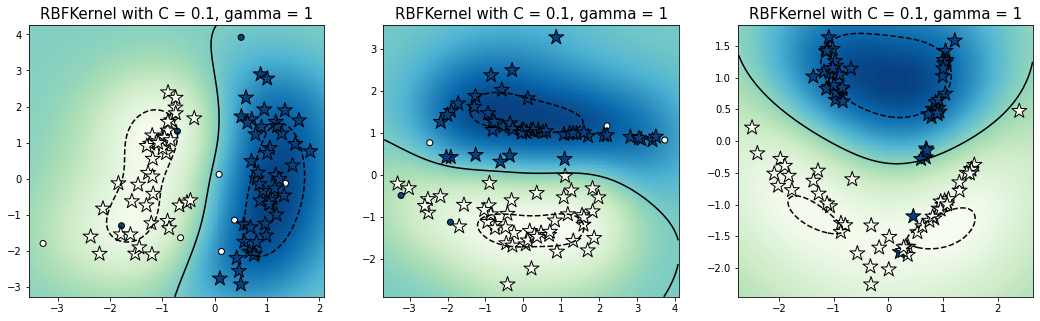

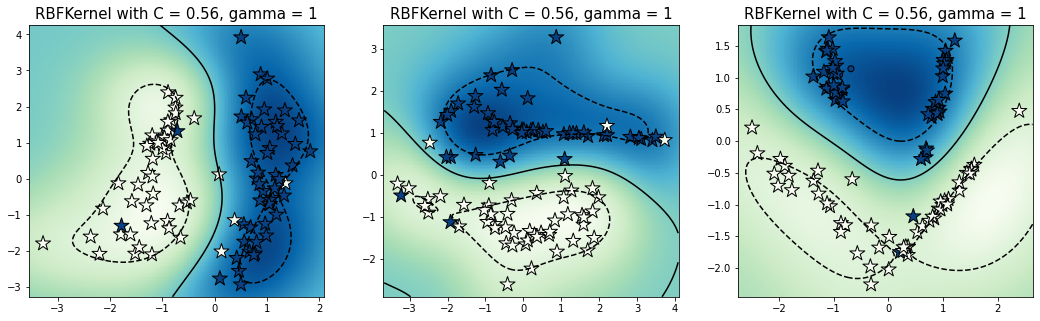

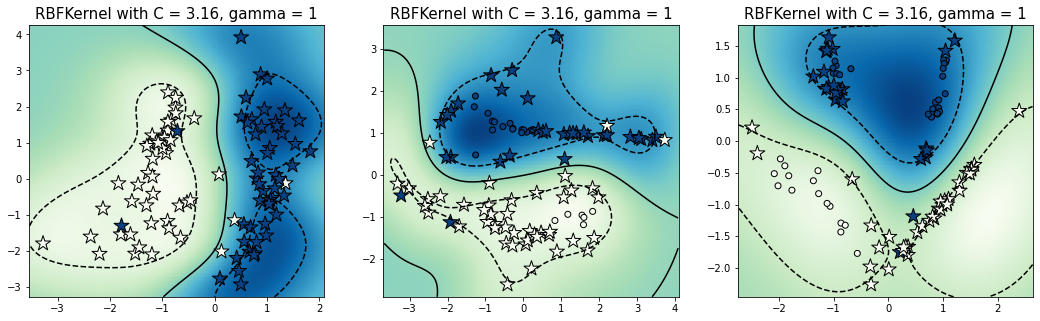

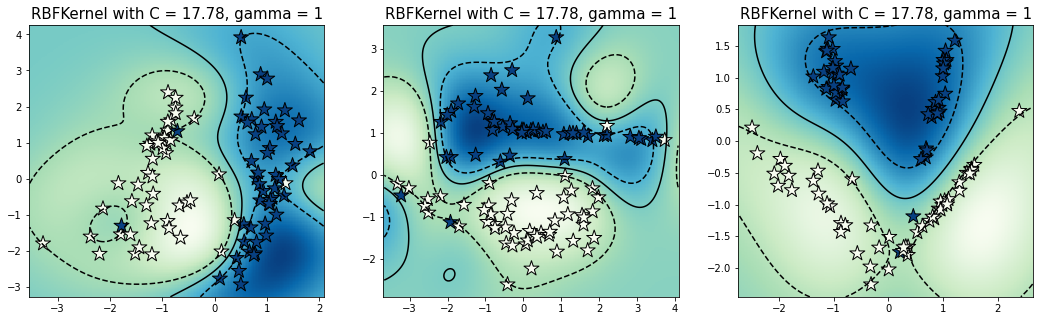

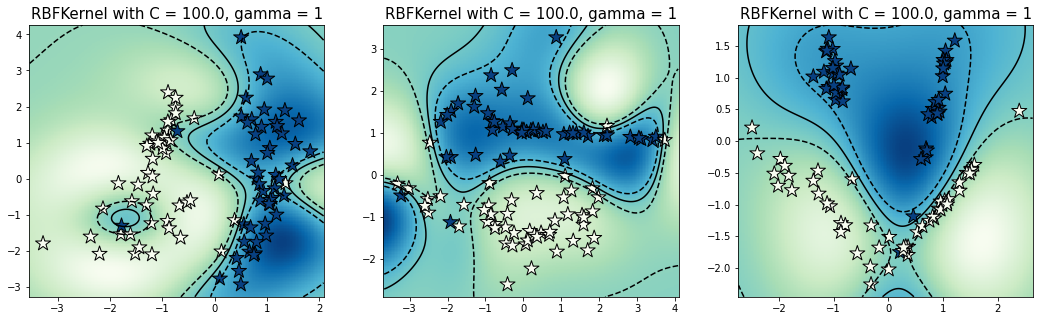

In [68]:
g = 1
RBFKernel = lambda x1, x2 : np.exp(-1 / (2 * g) * np.linalg.norm(x1 - x2) ** 2)
for C in params:
    model1, model2, model3 = DualSVM(C = C, kernel=RBFKernel), DualSVM(C = C, kernel = RBFKernel), DualSVM(C = C, kernel = RBFKernel)
    
    model1.fit(X1, y1)
    model2.fit(X2, y2)
    model3.fit(X3, y3)

    alpha1, alpha2, alpha3 = model1.alpha_, model2.alpha_, model3.alpha_
    b1, b2, b3 = model1.bias_, model2.bias_, model3.bias_
    X_sup_1, X_sup_2, X_sup_3 = model1.support_vectors_, model2.support_vectors_, model3.support_vectors_
    y_sup_1, y_sup_2, y_sup_3 = model1.support_vectors_class_, model2.support_vectors_class_, model3.support_vectors_class_

    fig, ax = plt.subplots(1, 3, figsize = (18, 5))

    ax[0].scatter(X1[:, 0], X1[:, 1], c = y1, cmap='GnBu', edgecolor='black')
    ax[1].scatter(X2[:, 0], X2[:, 1], c = y2, cmap='GnBu', edgecolor='black')
    ax[2].scatter(X3[:, 0], X3[:, 1], c = y3, cmap='GnBu', edgecolor='black')

    x_10_lim, x_11_lim, x_12_lim = np.array(ax[0].get_ylim()), np.array(ax[1].get_ylim()), np.array(ax[2].get_ylim())
    ax[0].set_ylim(x_10_lim[0], x_10_lim[1])
    ax[1].set_ylim(x_11_lim[0], x_11_lim[1])
    ax[2].set_ylim(x_12_lim[0], x_12_lim[1])

    ax[0].scatter(X_sup_1[:, 0], X_sup_1[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_1, s = 250, edgecolor='black')
    ax[1].scatter(X_sup_2[:, 0], X_sup_2[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_2, s = 250, edgecolor='black')
    ax[2].scatter(X_sup_3[:, 0], X_sup_3[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_3, s = 250, edgecolor='black')

    x00_vals = np.linspace(ax[0].get_xlim()[0], ax[0].get_xlim()[1], 200)
    x01_vals = np.linspace(ax[1].get_xlim()[0], ax[1].get_xlim()[1], 200)
    x02_vals = np.linspace(ax[2].get_xlim()[0], ax[2].get_xlim()[1], 200)

    x10_vals = np.linspace(ax[0].get_ylim()[0], ax[0].get_ylim()[1], 200)
    x11_vals = np.linspace(ax[1].get_ylim()[0], ax[1].get_ylim()[1], 200)
    x12_vals = np.linspace(ax[2].get_ylim()[0], ax[2].get_ylim()[1], 200)

    xx0, yy0 = np.meshgrid(x00_vals, x10_vals)
    xx1, yy1 = np.meshgrid(x01_vals, x11_vals)
    xx2, yy2 = np.meshgrid(x02_vals, x12_vals)

    zz0 = np.reshape(model1.predict_proba(np.c_[xx0.ravel(), yy0.ravel()]), xx0.shape)
    zz1 = np.reshape(model2.predict_proba(np.c_[xx1.ravel(), yy1.ravel()]), xx0.shape)
    zz2 = np.reshape(model3.predict_proba(np.c_[xx2.ravel(), yy2.ravel()]), xx0.shape)

    ax[0].contour(xx0, yy0, zz0, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    ax[1].contour(xx1, yy1, zz1, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    ax[2].contour(xx2, yy2, zz2, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)

    ax[0].pcolormesh(xx0, yy0, zz0, cmap='GnBu', shading = 'auto', zorder = 0)
    ax[1].pcolormesh(xx1, yy1, zz1, cmap='GnBu', shading = 'auto', zorder = 0)
    ax[2].pcolormesh(xx2, yy2, zz2, cmap='GnBu', shading = 'auto', zorder = 0)

    ax[0].set_title('RBFKernel with C = {0}, gamma = 1'.format(np.round(C, 2)), fontsize = 15)
    ax[1].set_title('RBFKernel with C = {0}, gamma = 1'.format(np.round(C, 2)), fontsize = 15)
    ax[2].set_title('RBFKernel with C = {0}, gamma = 1'.format(np.round(C, 2)), fontsize = 15)

Варьирование параметра $\gamma$ при $C = 1$

     pcost       dcost       gap    pres   dres
 0:  4.6385e+04 -2.3812e+05  3e+05  1e-13  4e-14
 1:  1.2281e+04 -2.9397e+04  4e+04  1e-13  3e-14
 2:  2.1059e+03 -5.6758e+03  8e+03  1e-13  2e-14
 3:  1.0415e+02 -1.1099e+03  1e+03  1e-14  8e-15
 4: -2.0150e+02 -3.5195e+02  2e+02  4e-15  6e-15
 5: -2.3790e+02 -2.6884e+02  3e+01  7e-15  4e-15
 6: -2.4532e+02 -2.5006e+02  5e+00  2e-14  6e-15
 7: -2.4656e+02 -2.4719e+02  6e-01  2e-14  6e-15
 8: -2.4674e+02 -2.4686e+02  1e-01  1e-14  6e-15
 9: -2.4679e+02 -2.4680e+02  7e-03  5e-14  5e-15
10: -2.4679e+02 -2.4679e+02  9e-05  3e-14  6e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.9034e+04 -1.9361e+05  2e+05  5e-14  4e-14
 1:  1.1930e+04 -2.1852e+04  3e+04  1e-14  3e-14
 2:  1.7327e+03 -3.0440e+03  5e+03  9e-16  2e-14
 3:  1.8310e+02 -4.2862e+02  6e+02  1e-14  5e-15
 4: -1.2561e+01 -9.4798e+01  8e+01  9e-15  2e-15
 5: -3.1032e+01 -4.3396e+01  1e+01  3e-15  7e-16
 6: -3.2941e+01 -3.4673e+01  2e+00  1e-15  4e-1

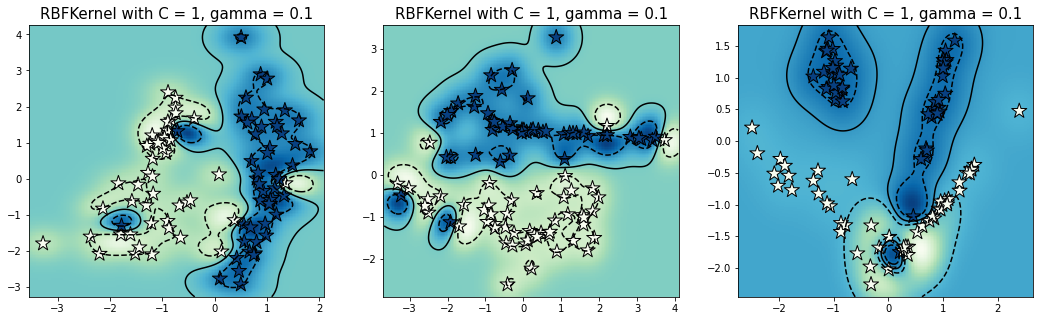

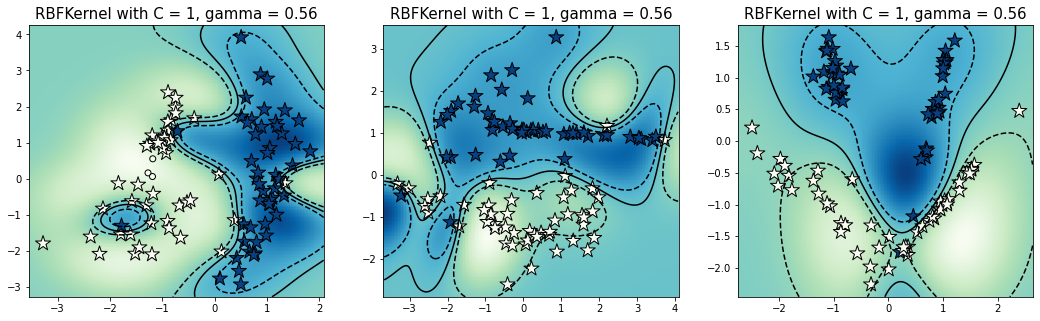

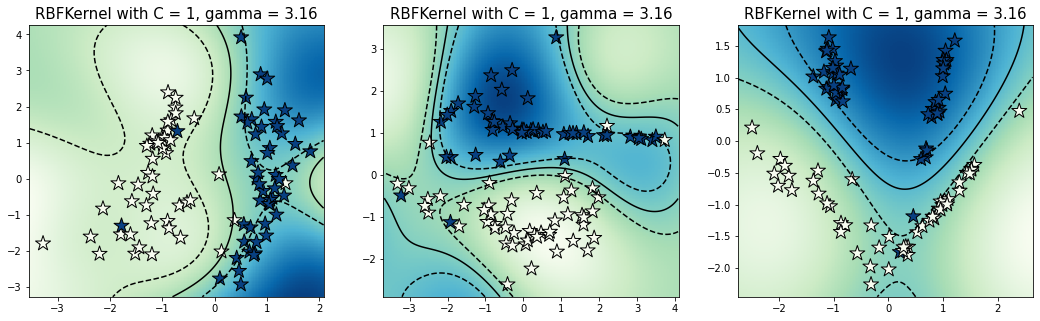

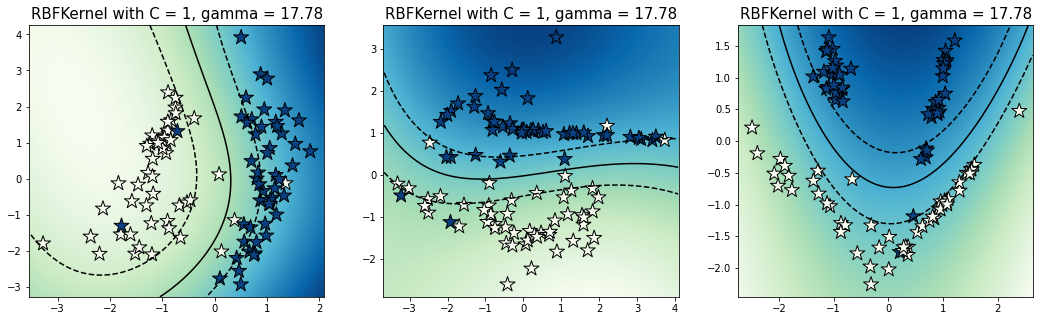

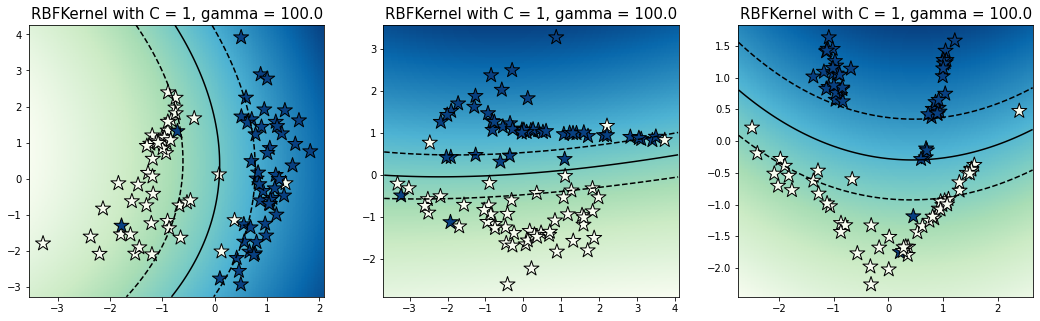

In [69]:
for g in gamma:
    RBFKernel = lambda x1, x2 : np.exp(-1 / (2 * g) * np.linalg.norm(x1 - x2) ** 2)
    model1, model2, model3 = DualSVM(C=C, kernel=RBFKernel), DualSVM(C=C, kernel=RBFKernel), DualSVM(C=C, kernel=RBFKernel)
    
    model1.fit(X1, y1)
    model2.fit(X2, y2)
    model3.fit(X3, y3)

    alpha1, alpha2, alpha3 = model1.alpha_, model2.alpha_, model3.alpha_
    b1, b2, b3 = model1.bias_, model2.bias_, model3.bias_
    X_sup_1, X_sup_2, X_sup_3 = model1.support_vectors_, model2.support_vectors_, model3.support_vectors_
    y_sup_1, y_sup_2, y_sup_3 = model1.support_vectors_class_, model2.support_vectors_class_, model3.support_vectors_class_

    fig, ax = plt.subplots(1, 3, figsize = (18, 5))

    ax[0].scatter(X1[:, 0], X1[:, 1], c = y1, cmap='GnBu', edgecolor='black')
    ax[1].scatter(X2[:, 0], X2[:, 1], c = y2, cmap='GnBu', edgecolor='black')
    ax[2].scatter(X3[:, 0], X3[:, 1], c = y3, cmap='GnBu', edgecolor='black')

    x_10_lim, x_11_lim, x_12_lim = np.array(ax[0].get_ylim()), np.array(ax[1].get_ylim()), np.array(ax[2].get_ylim())
    ax[0].set_ylim(x_10_lim[0], x_10_lim[1])
    ax[1].set_ylim(x_11_lim[0], x_11_lim[1])
    ax[2].set_ylim(x_12_lim[0], x_12_lim[1])

    ax[0].scatter(X_sup_1[:, 0], X_sup_1[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_1, s = 250, edgecolor='black')
    ax[1].scatter(X_sup_2[:, 0], X_sup_2[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_2, s = 250, edgecolor='black')
    ax[2].scatter(X_sup_3[:, 0], X_sup_3[:, 1], marker = '*', cmap = 'GnBu', c = y_sup_3, s = 250, edgecolor='black')

    x00_vals = np.linspace(ax[0].get_xlim()[0], ax[0].get_xlim()[1], 200)
    x01_vals = np.linspace(ax[1].get_xlim()[0], ax[1].get_xlim()[1], 200)
    x02_vals = np.linspace(ax[2].get_xlim()[0], ax[2].get_xlim()[1], 200)

    x10_vals = np.linspace(ax[0].get_ylim()[0], ax[0].get_ylim()[1], 200)
    x11_vals = np.linspace(ax[1].get_ylim()[0], ax[1].get_ylim()[1], 200)
    x12_vals = np.linspace(ax[2].get_ylim()[0], ax[2].get_ylim()[1], 200)

    xx0, yy0 = np.meshgrid(x00_vals, x10_vals)
    xx1, yy1 = np.meshgrid(x01_vals, x11_vals)
    xx2, yy2 = np.meshgrid(x02_vals, x12_vals)

    zz0 = np.reshape(model1.predict_proba(np.c_[xx0.ravel(), yy0.ravel()]), xx0.shape)
    zz1 = np.reshape(model2.predict_proba(np.c_[xx1.ravel(), yy1.ravel()]), xx0.shape)
    zz2 = np.reshape(model3.predict_proba(np.c_[xx2.ravel(), yy2.ravel()]), xx0.shape)

    ax[0].contour(xx0, yy0, zz0, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    ax[1].contour(xx1, yy1, zz1, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)
    ax[2].contour(xx2, yy2, zz2, levels=[-1, 0, 1], colors='k', linestyles = ['dashed', 'solid', 'dashed'], linewidths=1.5, zorder=1)

    ax[0].pcolormesh(xx0, yy0, zz0, cmap='GnBu', shading = 'auto', zorder = 0)
    ax[1].pcolormesh(xx1, yy1, zz1, cmap='GnBu', shading = 'auto', zorder = 0)
    ax[2].pcolormesh(xx2, yy2, zz2, cmap='GnBu', shading = 'auto', zorder = 0)

    ax[0].set_title('RBFKernel with C = 1, gamma = {0}'.format(np.round(g, 2)), fontsize = 15)
    ax[1].set_title('RBFKernel with C = 1, gamma = {0}'.format(np.round(g, 2)), fontsize = 15)
    ax[2].set_title('RBFKernel with C = 1, gamma = {0}'.format(np.round(g, 2)), fontsize = 15)

 Вывод: Большие параметры $C$ и малые параметры $\gamma$ ведут к переобучение, а малые $C$ и большие $\gamma$ - к слишком грубой модели.

Вывод 2: я могла бы отдохнуть в выходные, а не заниматься этими замечательными графи